# TASK
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label.

NECESSARY    LIBRARIES    &   DATASET

In [145]:
#Importing basic packages
import pandas as pd
import numpy as np

# For Graphs
import matplotlib.pyplot as plt 
import seaborn as sns
# For beautification of charts
from seaborn.widgets import color_palette
# For SIZE of charts
sns.set(rc={'figure.figsize':(15,6)})

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
# For Train data & Test data split
from sklearn.model_selection import train_test_split

Loading the RAW DATA

In [146]:
f1=r"F:\Python\ML\Credit_Risk_Project\application_record.csv"
f2=r"F:\Python\ML\Credit_Risk_Project\credit_record.csv"

Application_Record = pd.read_csv(f1)
Credit_Record = pd.read_csv(f2)

Basic Details

In [147]:
print('APPLICATION_RECORD shape is:',Application_Record.shape)
print(Application_Record.head())
print('CREDIT_RECORD shape is:',Credit_Record.shape) 
print(Credit_Record.head())

APPLICATION_RECORD shape is: (438557, 18)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civi

Checking for Null Values and Suspicious Records

In [148]:
Application_Record.columns.values
Application_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

OCCUPATION_TYPE has missing words

In [149]:
Credit_Record.columns.values
Credit_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


No Missing Records in Credit_Record

Checking the relationship between two tables using the ID Variable

In [150]:
Credit_Record
#45985 Records
Application_Record
#438510 Records
print('Unique ID in CREDIT_RECORD:',len(Credit_Record['ID'].unique()))
print('Unique ID in APPLICATION_RECORD:',len(Application_Record['ID'].unique()))
#NOTE TO SELF-unique gives the array of unique records, nunique gives the count
#SAME thing can be done by using len and also nunique
print('Unique ID in CREDIT_RECORD:',Credit_Record['ID'].nunique())
print('Unique ID in APPLICATION_RECORD:',Application_Record['ID'].nunique() )

Unique ID in CREDIT_RECORD: 45985
Unique ID in APPLICATION_RECORD: 438510
Unique ID in CREDIT_RECORD: 45985
Unique ID in APPLICATION_RECORD: 438510


# DATA EXPLORATION AND VALIDATION

CATEGORICAL/DISCRETE FIELDS
<br>Application_Record['ID']-Discrete Field

In [151]:
ID_COUNT=Application_Record.groupby(['ID']).agg({'ID':'count'})
DUPLICATE_ID=ID_COUNT[ID_COUNT['ID']>1]
len(DUPLICATE_ID) 

#Checking few record
Application_Record[Application_Record['ID']==7022197] #Male & Female
Application_Record[Application_Record['ID']==7207977] #Female & Female ,OCCUPATION_TYPE is not there when pensioner, then started working
Application_Record[Application_Record['ID']==7036518] #Female & Female ,
Application_Record[Application_Record['ID']==7089090] #Female & Female,NAME_INCOME_TYPE is diff,AMT_INCOME_TOTAL is diff,DAYS_BIRTH is diff
DUP_ID=Application_Record[Application_Record['ID'].duplicated()==True]['ID'].unique()
DUP_ID

array([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285], dtype=int64)

ID HAS 438510 UNIQUE Records ,47 Records are duplicate having only one extra record
<br>GOOD THING IS THESE 47 RECORDS ARE NOT PRESENT IN THE CREDIT_RECORD TABLE

In [152]:
Application_Record[Application_Record['ID'].isin ([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])]

Credit_Record[Credit_Record['ID'].isin ([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])]

,ID,MONTHS_BALANCE,STATUS


Application_Record['CNT_CHILDREN']-Discrete Field
<br>This denotes the number of children the client has

In [153]:
print(Application_Record['CNT_CHILDREN'].value_counts())

#Testing what happens when we apply percentile on Discrete
util_percentiles=Application_Record['CNT_CHILDREN'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,.999,1])
round(util_percentiles,2)
Application_Record[Application_Record['CNT_CHILDREN']>10]
Application_Record[Application_Record['NAME_FAMILY_STATUS']=='Single / not married']['CNT_CHILDREN'].unique()
Application_Record[Application_Record['CNT_CHILDREN']>10]['NAME_FAMILY_STATUS'].value_counts()
Application_Record[Application_Record['CNT_CHILDREN']>10]['CNT_CHILDREN'].describe()
Application_Record[Application_Record['CNT_CHILDREN']<=10]['CNT_CHILDREN'].describe()
Application_Record['CNT_CHILDREN'].describe()
Application_Record['CNT_CHILDREN'].median()

CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64


0.0

Application_Record['CNT_CHILDREN']-Discrete Field

Application_Record['CNT_FAM_MEMBERS']-Discrete Field
<br>This denotes the family size of the client.

In [154]:
print(Application_Record['CNT_FAM_MEMBERS'].value_counts())
Application_Record[Application_Record['CNT_FAM_MEMBERS']>19]
Application_Record[Application_Record['CNT_FAM_MEMBERS']>10]
Application_Record[Application_Record['NAME_FAMILY_STATUS']=='Single / not married']['CNT_FAM_MEMBERS'].unique()
Application_Record[Application_Record['CNT_FAM_MEMBERS']>10]['NAME_FAMILY_STATUS'].value_counts()
Application_Record[Application_Record['CNT_FAM_MEMBERS']>10]['CNT_FAM_MEMBERS'].describe()
Application_Record[Application_Record['CNT_FAM_MEMBERS']>=10]['CNT_FAM_MEMBERS'].describe()
Application_Record[Application_Record['CNT_FAM_MEMBERS']<=10]['CNT_FAM_MEMBERS'].describe()
Application_Record['CNT_FAM_MEMBERS'].describe()


CNT_FAM_MEMBERS
2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: count, dtype: int64


count    438557.000000
mean          2.194465
std           0.897207
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Credit_Record['ID']-Discrete Field
<br>This denotes the client number like we have in APPLICATION_RECORD

In [155]:
ID_COUNT=Credit_Record.groupby(['ID']).agg({'ID':'count'})
len(Credit_Record['ID'].unique())

45985

Credit_Record['STATUS']-Discrete Field

<br>This denotes the status of credit account of the customer for various months depending on whether he is paying on time or delaying. The following are the status depending on the payment of debt.

0: 1-29 days past due
<br>1: 30-59 days past due
<br>2: 60-89 days overdue
<br>3: 90-119 days overdue
<br>4: 120-149 days overdue
<br>5: Overdue or bad debts, write-offs for more than 150 days
<br>C: paid off that month
<br>X: No loan for the month

In [156]:
Credit_Record['STATUS'].value_counts()
# ID HAS 1048575 Records ,45985 IDs Records are unique
# All records are present

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

Application_Record['CODE_GENDER']-Categorical Field
<br>This denotes the sex of the customer
<br>M-Male
<br>F-Female

CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\295502962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="CODE_GENDER",  data=Application_Record, palette=['magenta',"purple"])


<Axes: xlabel='count', ylabel='CODE_GENDER'>

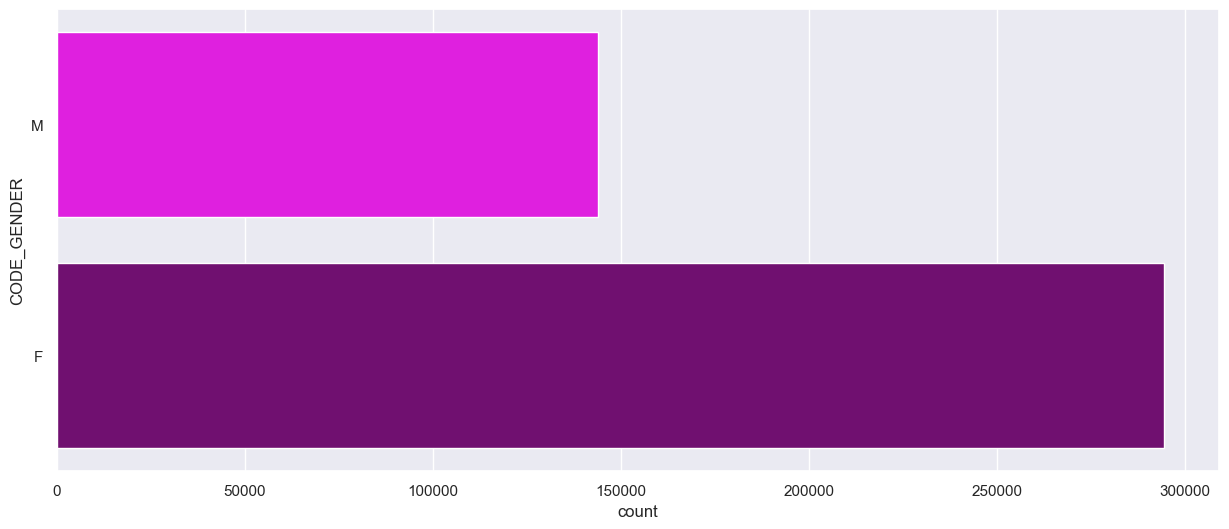

In [157]:
print(Application_Record['CODE_GENDER'].value_counts())
sns.countplot(y="CODE_GENDER",  data=Application_Record, palette=['magenta',"purple"])

Application_Record['FLAG_OWN_CAR']-Categorical Field
<br>This denotes whether the client owns a car or not
<br>Y-Yes
<br>N-No

FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='FLAG_OWN_CAR'>

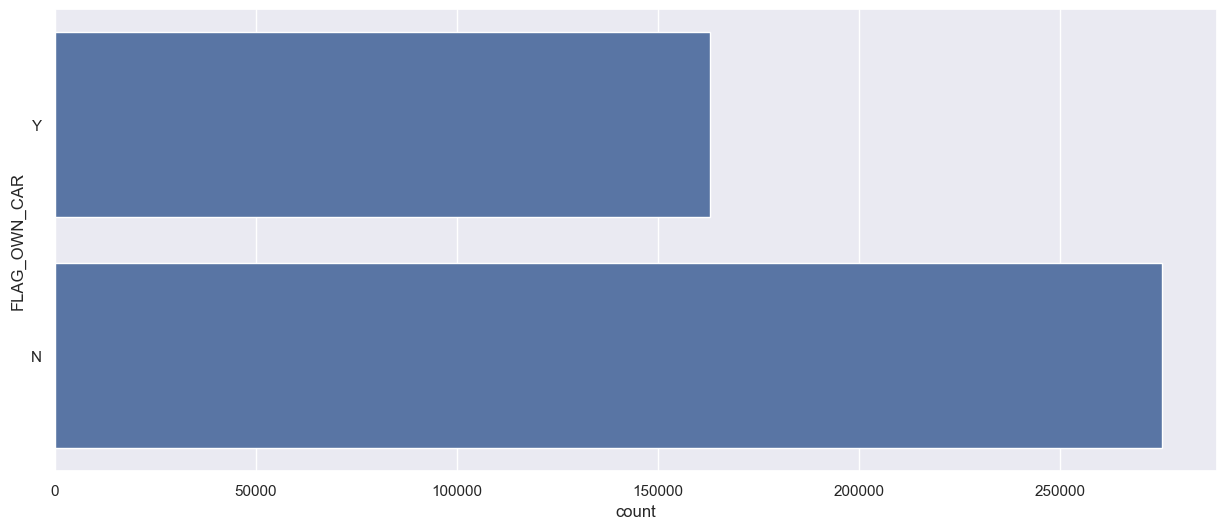

In [158]:
print(Application_Record['FLAG_OWN_CAR'].value_counts())
sns.countplot(y="FLAG_OWN_CAR",  data=Application_Record)

Application_Record[FLAG_OWN_REALTY']-Categorical Field
This denotes whether the client owns a car or not
<br>Y-Yes
<br>N-No

FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='FLAG_OWN_REALTY'>

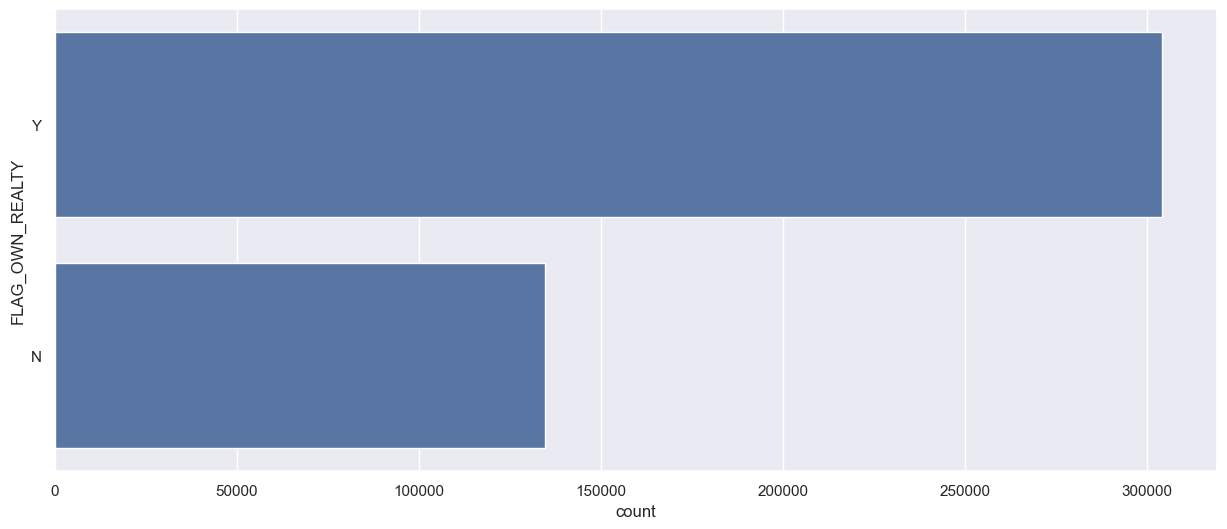

In [159]:
print(Application_Record['FLAG_OWN_REALTY'].value_counts())
sns.countplot(y="FLAG_OWN_REALTY",  data=Application_Record)

Application_Record['NAME_INCOME_TYPE']-Categorical Field
This denotes under which income category does the client falls.
<br>Working
<br>Commercial associate
<br>Pensioner
<br>State servant
<br>Student

NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\4177441099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NAME_INCOME_TYPE",  data=Application_Record, palette='Set1')


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1464,5010456,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1465,5010457,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1466,5010458,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1467,5010459,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1468,5010460,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1469,5010461,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1470,5010462,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1471,5010463,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
6220,5025088,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0
6221,6063169,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0


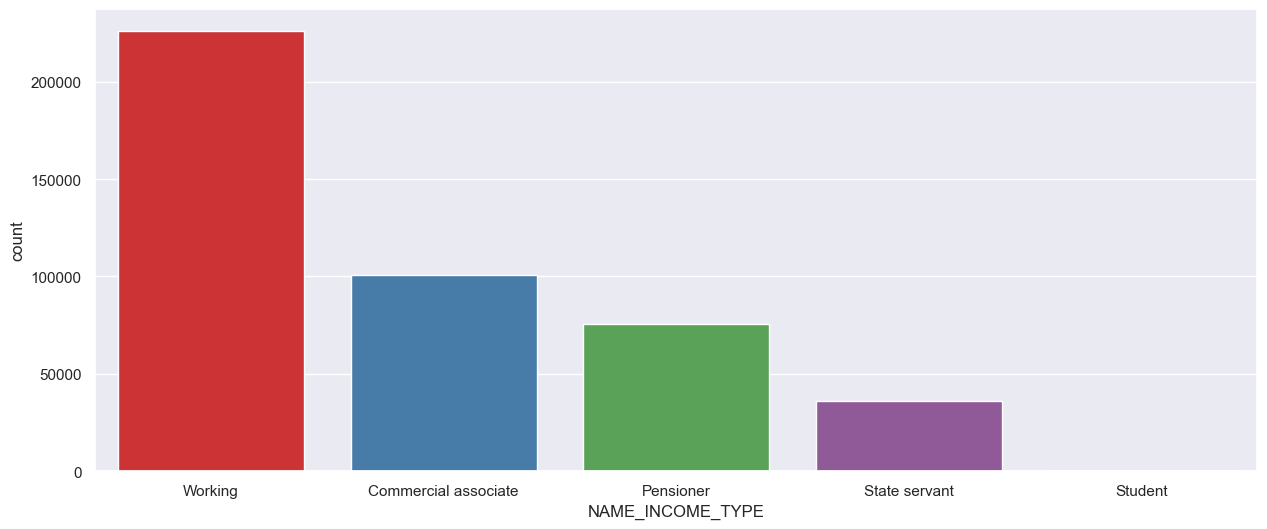

In [160]:
print(Application_Record['NAME_INCOME_TYPE'].value_counts())
sns.countplot(x="NAME_INCOME_TYPE",  data=Application_Record, palette='Set1')
Application_Record[Application_Record['NAME_INCOME_TYPE']=='Student']

Application_Record['NAME_FAMILY_STATUS']-Categorical Field
This denotes the marital status of the client
<br>Married
<br>Single / not married
<br>Civil marriage
<br>Separated
<br>Widow

NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\4254183946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NAME_FAMILY_STATUS",  data=Application_Record, palette="Set1")


<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

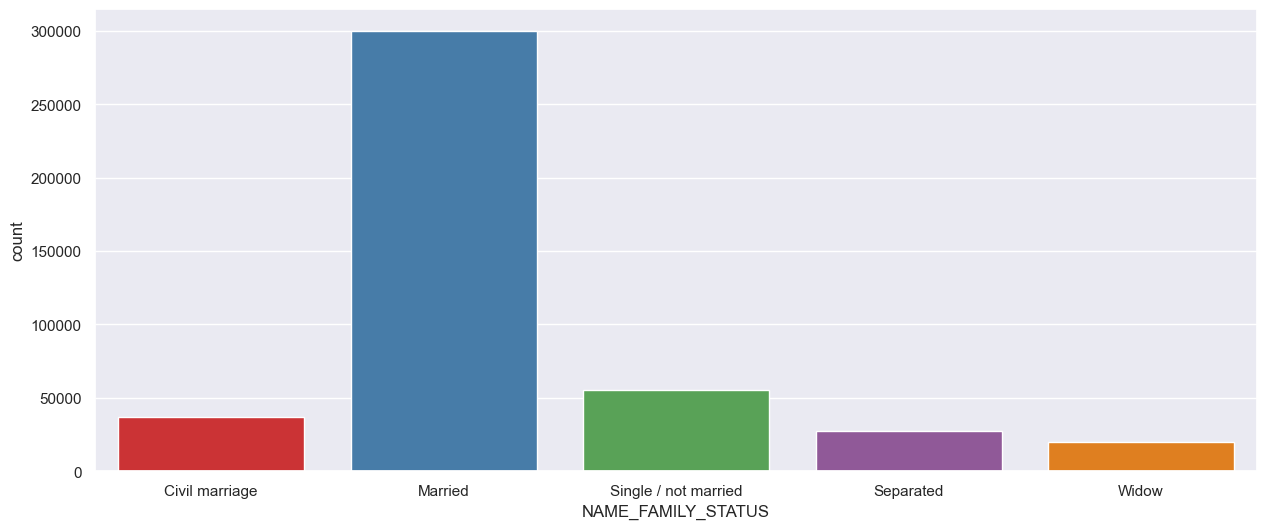

In [161]:
print(Application_Record['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(x="NAME_FAMILY_STATUS",  data=Application_Record, palette="Set1")

Application_Record['NAME_HOUSING_TYPE']-Categorical Field

This denotes the way of living of the client
House / apartment
<br>With parents
<br>Municipal apartment
<br>Rented apartment
<br>Office apartment
<br>Co-op apartment

NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\3597230719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NAME_HOUSING_TYPE",  data=Application_Record, palette='Set2')


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

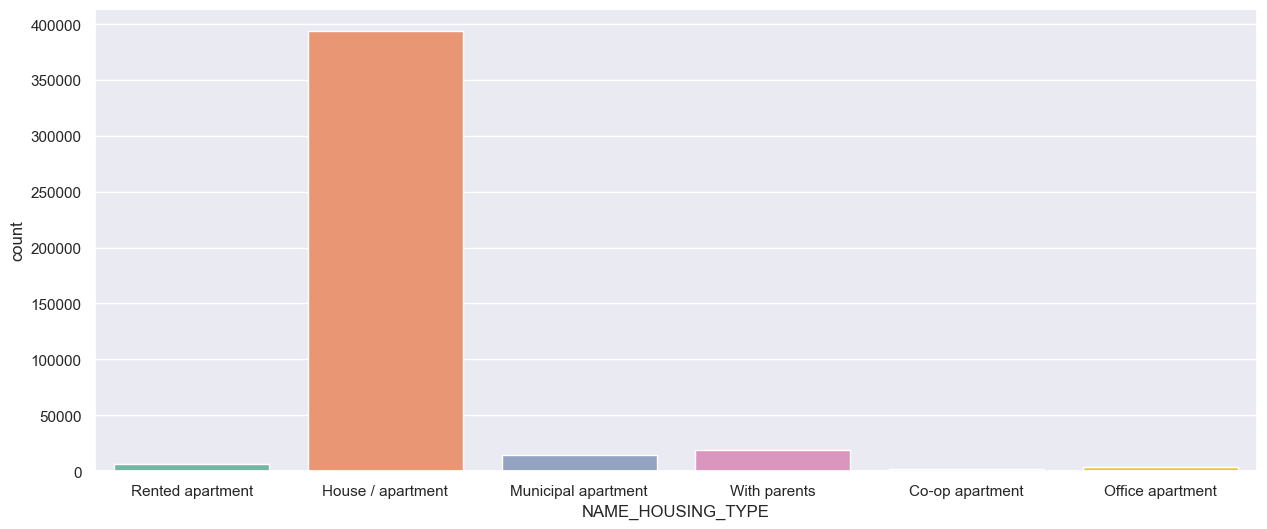

In [162]:
print(Application_Record['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(x="NAME_HOUSING_TYPE",  data=Application_Record, palette='Set2')

Application_Record['FLAG_MOBIL']-Categorical Field

This denotes whether the client owns a mobile phone or not.
<br>1-Owns Mobile
<br>0-Does not own a mobile.

FLAG_MOBIL
1    438557
Name: count, dtype: int64


<Axes: xlabel='FLAG_MOBIL', ylabel='count'>

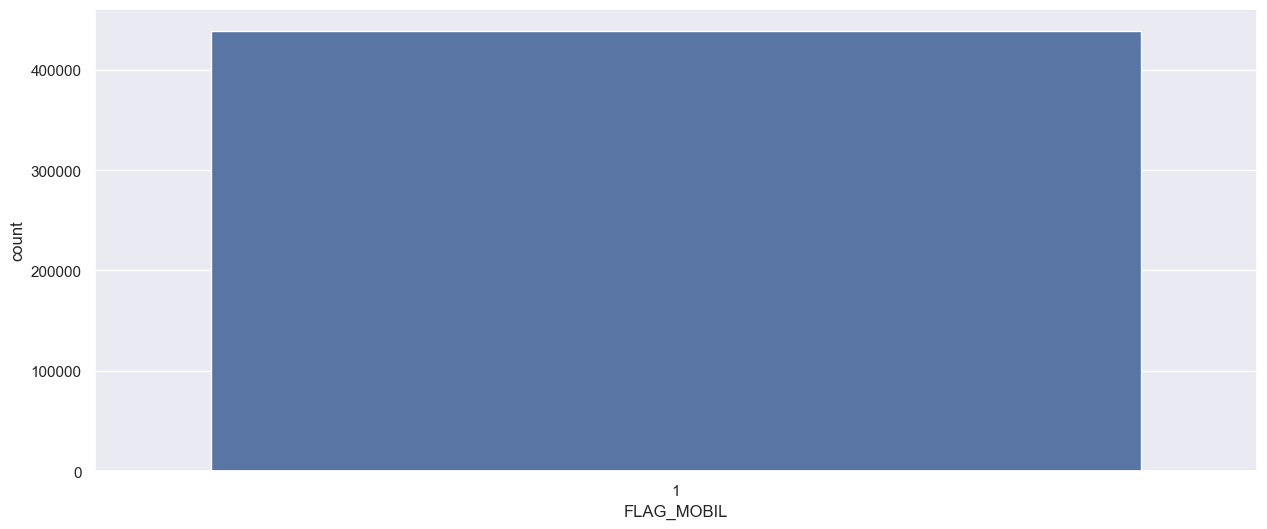

In [163]:
print(Application_Record['FLAG_MOBIL'].value_counts())
sns.countplot(x="FLAG_MOBIL",  data=Application_Record)

APPLICATION_RECORD['FLAG_WORK_PHONE']-Categorical Field

<br>This denotes whether the client have a work phone or not.
<br>1-Having a work phone
<br>0-Does not have a work phone

FLAG_WORK_PHONE
0    348156
1     90401
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1520143674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_WORK_PHONE",  data=Application_Record, palette='Set1')


<Axes: xlabel='FLAG_WORK_PHONE', ylabel='count'>

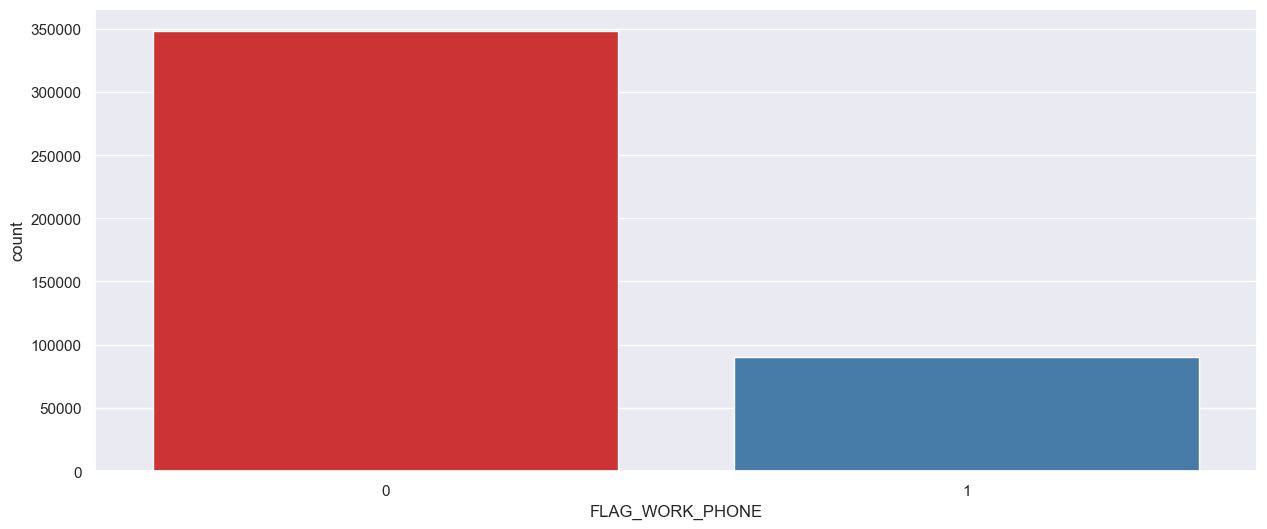

In [164]:
print(Application_Record['FLAG_WORK_PHONE'].value_counts())
sns.countplot(x="FLAG_WORK_PHONE",  data=Application_Record, palette='Set1')

Application_Record['FLAG_PHONE']-Categorical Field

<br>This denotes whether the client owns a land phone or not.
<br>1-Have a phone
<br>0-Do not have a phone

FLAG_PHONE
0    312353
1    126204
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1129986284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_PHONE",  data=Application_Record, palette='Set1')


<Axes: xlabel='FLAG_PHONE', ylabel='count'>

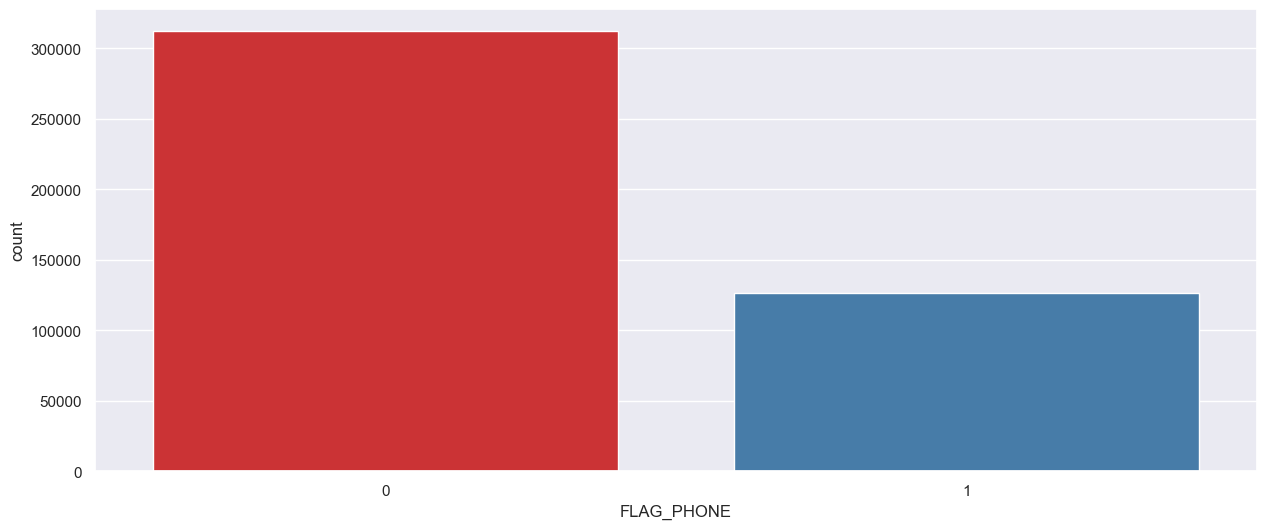

In [165]:
print(Application_Record['FLAG_PHONE'].value_counts())
sns.countplot(x="FLAG_PHONE",  data=Application_Record, palette='Set1')

Application_Record['FLAG_EMAIL']-Categorical Field

<br>This denotes whether the client has email or not
<br>1-Have Email
<br>0-Do Not Have Email

FLAG_EMAIL
0    391102
1     47455
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1308769715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_EMAIL",  data=Application_Record, palette='Set2')


0.12133663341021013


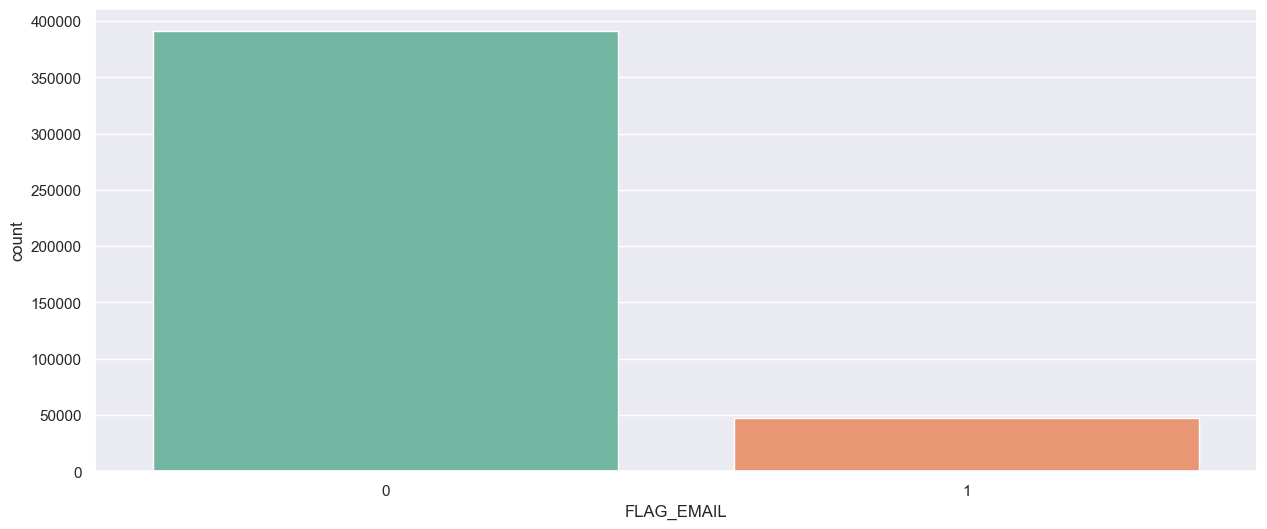

In [166]:
print(Application_Record['FLAG_EMAIL'].value_counts())
sns.countplot(x="FLAG_EMAIL",  data=Application_Record, palette='Set2')

print(len(Application_Record['FLAG_EMAIL'][Application_Record['FLAG_EMAIL']==1])/len(Application_Record['FLAG_EMAIL'][Application_Record['FLAG_EMAIL']==0]))

APPLICATION_RECORD['OCCUPATION_TYPE']-Categorical Field

<br>It denotes in which type of occupation,the client is involved in.
<br>Laborers
<br>Core staff
<br>Sales staff
<br>Managers
<br>Drivers
<br>High skill tech staff
<br>Accountants
<br>Medicine staff
<br>Cooking staff
<br>Security staff
<br>Cleaning staff
<br>Private service staff
<br>Low-skill Laborers
<br>Secretaries
<br>Waiters/barmen staff
<br>Realty agents
<br>HR staff
<br>IT staff

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1199612588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="OCCUPATION_TYPE",  data=Application_Record, palette='Set1')


0.44094376942639163

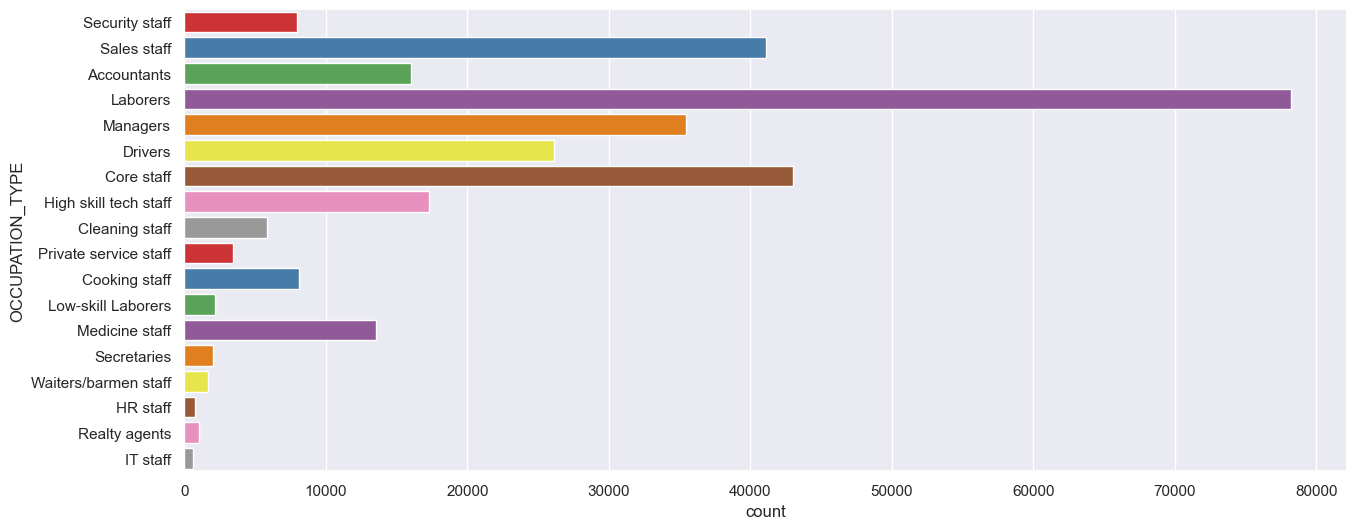

In [167]:
print(Application_Record['OCCUPATION_TYPE'].value_counts())
sns.countplot(y="OCCUPATION_TYPE",  data=Application_Record, palette='Set1')
Application_Record['OCCUPATION_TYPE'].isnull().sum()/Application_Record['OCCUPATION_TYPE'].count()

# CONTINUOUS FILED

Application_Record['AMT_INCOME_TOTAL']-CONTINUOUS FIELD
<br>It denotes the total income of the client

187.4195377937978


count    438550.000000
mean        187.419538
std         106.920010
min          26.100000
25%         121.500000
50%         160.780500
75%         225.000000
max        4500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

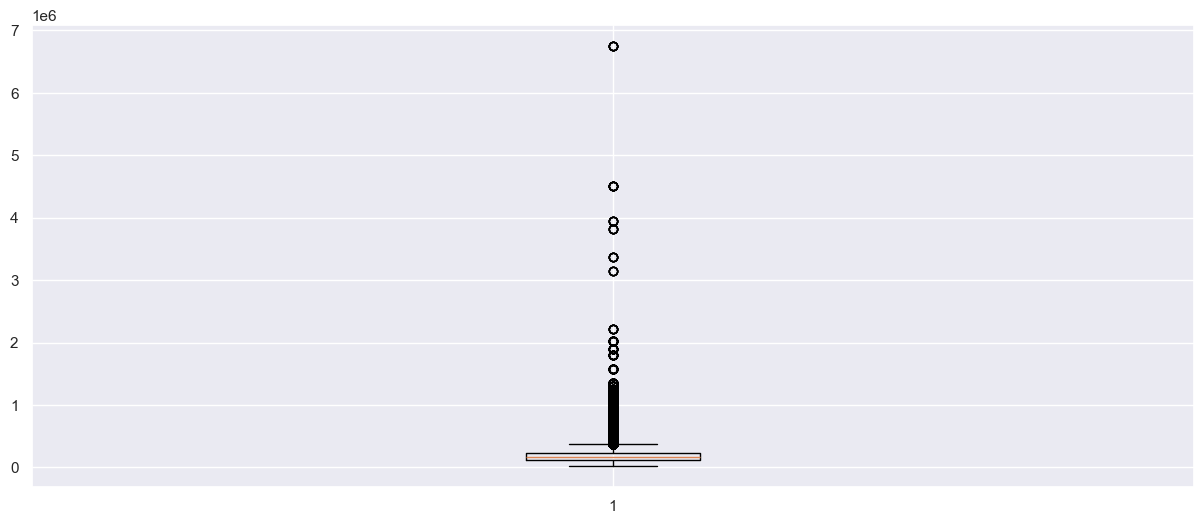

In [168]:
plt.boxplot(Application_Record["AMT_INCOME_TOTAL"])
util_percentiles=Application_Record['AMT_INCOME_TOTAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)
#NOTE TO SELF-DRAWING A FREQUENCY COUNT PLOT FOR CONTINUOUS DATA WILL NOT GIVE US ANYTHING TO UNDERSTAND
# plt.hist(Application_Record['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_v1=Application_Record['AMT_INCOME_TOTAL']/1000
AMT_INCOME_TOTAL_v1.describe()
util_percentiles=Application_Record['AMT_INCOME_TOTAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(util_percentiles,2)
(Application_Record[Application_Record['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).describe()
(Application_Record['AMT_INCOME_TOTAL']/1000).describe()

print((Application_Record[Application_Record['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).mean())
(Application_Record[Application_Record['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).describe()

Application_Record['DAYS_BIRTH']-CONTINUOUS FIELD(Birthday)

<br>It denotes the DOB of the client. This is storing data backwards from current date. For example -1 denotes yesterday.

count    438557.000000
mean     -15997.904649
std        4185.030007
min      -25201.000000
25%      -19483.000000
50%      -15630.000000
75%      -12514.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

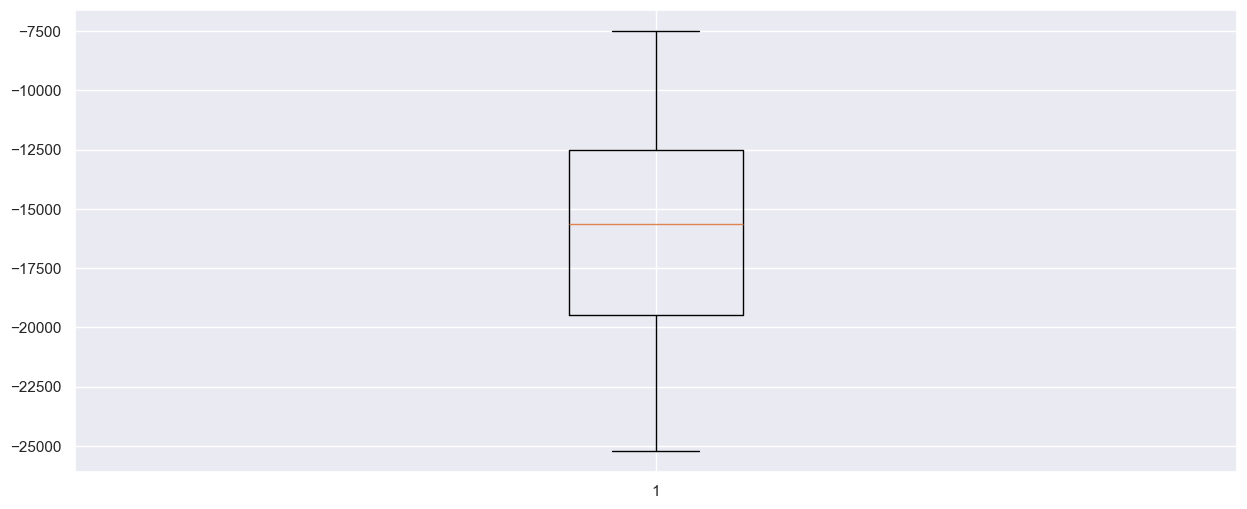

In [169]:
plt.boxplot(Application_Record["DAYS_BIRTH"])
Application_Record[Application_Record["DAYS_BIRTH"]>0]
Application_Record["DAYS_BIRTH"].describe()


Applocation_Record['DAYS_EMPLOYED']-CONTINUOUS FIELD(Employed since)

It denotes the total working experince of the employee. This also saves data counting days backward from current date.For example -1 implements the employee has been working for 1 day only and any positive data denotes that the employee is not working.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7d28620f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7d2862360>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7d28624e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7d2860f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7d28610d0>],
 'means': []}

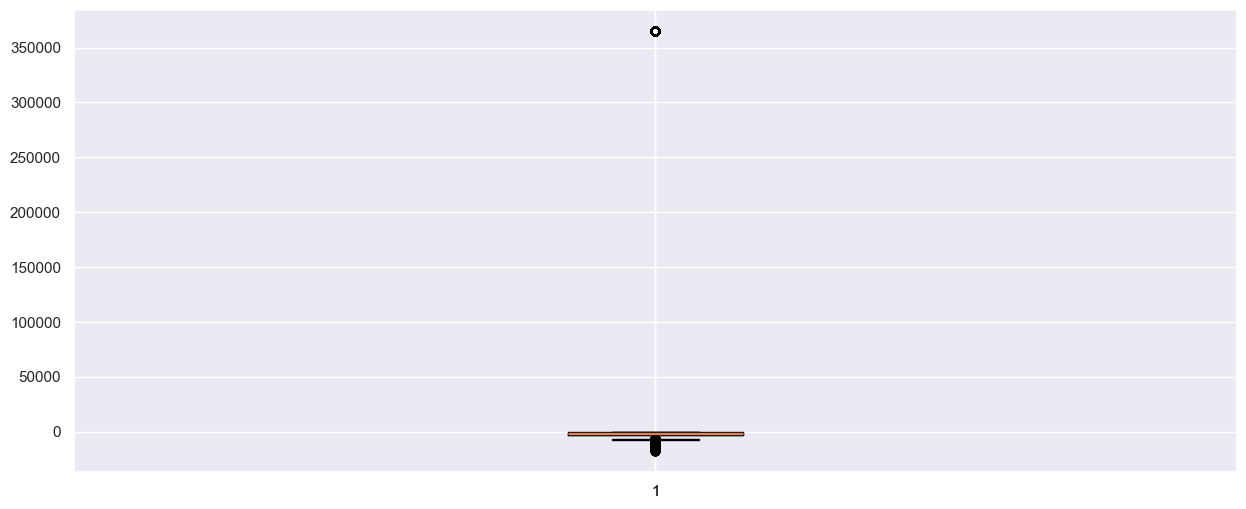

In [170]:
Application_Record[Application_Record["DAYS_EMPLOYED"]>0]
Application_Record[Application_Record["DAYS_EMPLOYED"]>0]['DAYS_EMPLOYED'].unique()
plt.boxplot(Application_Record["DAYS_EMPLOYED"])
Application_Record["DAYS_EMPLOYED"].mean()
Application_Record["DAYS_EMPLOYED"].describe()
util_percentiles=Application_Record['DAYS_EMPLOYED'].quantile([0.00,0.01,0.02,0.03,0.04,0.05, 0.1, 0.25, 0.5, 0.75, 0.80,.81,.82,.825,.826,.827,.8281,.8282,.8283,.8284,.8285,.8286,.8287,.8288,.8289,.829,.83,.84,.85,.86,.87,.88,.89, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)
APPLICATION_RECORD_V1=Application_Record[Application_Record['DAYS_EMPLOYED']==365243][['DAYS_EMPLOYED','OCCUPATION_TYPE','AMT_INCOME_TOTAL','NAME_INCOME_TYPE']]
APPLICATION_RECORD_V1['OCCUPATION_TYPE'].unique()
APPLICATION_RECORD_V2=Application_Record[Application_Record['DAYS_EMPLOYED']!=365243]
plt.boxplot(APPLICATION_RECORD_V2["DAYS_EMPLOYED"])

Credit_Record['MONTHS_BALANCE']-CONTINUOUS FIELD

This denotes the data of individual number of months for which customer is associated with the business and it's corresponding status is shown in STATUS variable

0.0000   -60.0
0.0100   -54.0
0.0200   -51.0
0.0300   -49.0
0.0400   -47.0
0.0500   -46.0
0.1000   -40.0
0.2500   -29.0
0.5000   -17.0
0.7500    -7.0
0.8000    -6.0
0.8100    -5.0
0.8200    -5.0
0.8250    -5.0
0.8260    -5.0
0.8270    -5.0
0.8281    -5.0
0.8282    -5.0
0.8283    -5.0
0.8284    -5.0
0.8285    -5.0
0.8286    -5.0
0.8287    -5.0
0.8288    -5.0
0.8289    -5.0
0.8290    -5.0
0.8300    -5.0
0.8400    -4.0
0.8500    -4.0
0.8600    -4.0
0.8700    -3.0
0.8800    -3.0
0.8900    -3.0
0.9000    -3.0
0.9100    -2.0
0.9500    -1.0
0.9600    -1.0
0.9700     0.0
0.9750     0.0
0.9800     0.0
0.9900     0.0
1.0000     0.0
Name: MONTHS_BALANCE, dtype: float64

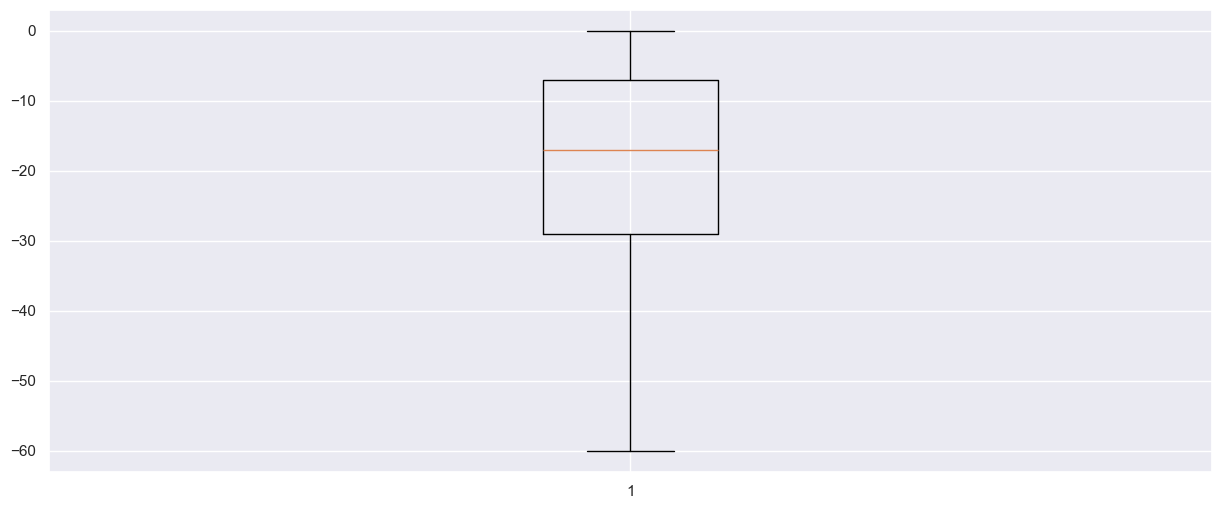

In [171]:
Credit_Record[Credit_Record["MONTHS_BALANCE"]>0]
Credit_Record["MONTHS_BALANCE"].value_counts()
plt.boxplot(Credit_Record["MONTHS_BALANCE"])
util_percentiles=Credit_Record['MONTHS_BALANCE'].quantile([0.00,0.01,0.02,0.03,0.04,0.05, 0.1, 0.25, 0.5, 0.75, 0.80,.81,.82,.825,.826,.827,.8281,.8282,.8283,.8284,.8285,.8286,.8287,.8288,.8289,.829,.83,.84,.85,.86,.87,.88,.89, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

# DERIVING THE TARGET VARIABLE

The target variable will be derived using two logic

1) FOR STRICT BANK A customer who will be even having a single record of 1 month DPD will be considered as BAD CUSTOMER

1) FOR LENIENT BANK A customer with records of 1 month DPD and 2 month DPD will be considered as GOOD CUSTOMERS given that they do not have a single record of 3 months DPD

In [172]:
Credit_Record['ID'].value_counts().describe()
Credit_Record.groupby(['ID']).agg({'MONTHS_BALANCE':'min'})
Credit_Record.sort_values(by=['ID','MONTHS_BALANCE'],ascending=([True,False]))

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# FINDINGS

As we can clearly see that in STRICT approach the percentage of GOOD customers is hardly 13% and that of BAD customers is 87 percent which is not an ideal scenario. So we will take the lenient approach which is actually followed by many banks when they report a customer as bad customer or a loan/cc as NPA only after a customer has failed to pay after 2 months DPD. So we will consider the LENIENT approach where the percentage of BAD customers is close to 1.5% only which is an ideal case considering banking industry.

In [173]:
Credit_Record_V1=pd.pivot_table(Credit_Record, values ='MONTHS_BALANCE', index =['ID'],columns =['STATUS'],aggfunc= {'STATUS':'count'}).fillna(0).reset_index().astype(int)
Credit_Record_V1['TOTAL_NO_OF_MONTHS']=Credit_Record_V1['0']+Credit_Record_V1['1']+Credit_Record_V1['2']+Credit_Record_V1['3']+Credit_Record_V1['4']+Credit_Record_V1['5']+Credit_Record_V1['C']+Credit_Record_V1['X']
Credit_Record_V1.rename(columns={'0':'1_MONTH_LATE','1':'2_MONTH_LATE','2':'3_MONTH_LATE','3':'4_MONTH_LATE','4':'5_MONTH_LATE','5':'OVERDUE_BAD_DEBT','C':'PAID_OFF','X':'NO_LOAN',},inplace=True)
Credit_Record_V1

STATUS,ID,1_MONTH_LATE,2_MONTH_LATE,3_MONTH_LATE,4_MONTH_LATE,5_MONTH_LATE,OVERDUE_BAD_DEBT,PAID_OFF,NO_LOAN,TOTAL_NO_OF_MONTHS
0,5001711,3,0,0,0,0,0,0,1,4
1,5001712,10,0,0,0,0,0,9,0,19
2,5001713,0,0,0,0,0,0,0,22,22
3,5001714,0,0,0,0,0,0,0,15,15
4,5001715,0,0,0,0,0,0,0,60,60
...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12,0,0,0,0,0,6,0,18
45981,5150483,0,0,0,0,0,0,0,18,18
45982,5150484,12,0,0,0,0,0,1,0,13
45983,5150485,2,0,0,0,0,0,0,0,2


INTRODUCING THE TARGET VARIABLE GOOD_OR_BAD

<br>1-GOOD
<br>2-BAD

FOR STRICT BANK-ANY CUSTOMER WHO HAVE RECORD OF EVEN 1 MONTHS DPD IS CONSIDERED AS BAD CUSTOMER

In [174]:
Credit_Record_Strict= Credit_Record_V1
Credit_Record_Strict['GOOD_OR_BAD']=0
Credit_Record_Strict['GOOD_OR_BAD'][(Credit_Record_Strict['1_MONTH_LATE']==0) & 
                                    (Credit_Record_Strict['2_MONTH_LATE']==0) &
                                    (Credit_Record_Strict['3_MONTH_LATE']==0) &
                                    (Credit_Record_Strict['4_MONTH_LATE']==0) &
                                    (Credit_Record_Strict['5_MONTH_LATE']==0) &
                                    (Credit_Record_Strict['OVERDUE_BAD_DEBT']==0)]=1
print('Credit_Record_Strict \n',Credit_Record_Strict['GOOD_OR_BAD'].value_counts())

Credit_Record_Strict 
 GOOD_OR_BAD
0    40032
1     5953
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\2156519657.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Credit_Record_Strict['GOOD_OR_BAD'][(Credit_Record_Strict['1_MONTH_LATE']==0) &
C:\Users\Legion\AppData\Local\Temp\ipykernel_743

FOR LENIENT BANK-ANY CUSTOMER WHO HAVE RECORD FOR 3 MONTH AND ABOVE DPD IS CONSIDERED AS BAD CUSTOMER

In [175]:
CREDIT_RECORD_LENIENT=Credit_Record_V1
CREDIT_RECORD_LENIENT['GOOD_OR_BAD']=0
CREDIT_RECORD_LENIENT['GOOD_OR_BAD'][(CREDIT_RECORD_LENIENT['3_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['4_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['5_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['OVERDUE_BAD_DEBT']==0)]=1
print('CREDIT_RECORD_LENIENT \n',CREDIT_RECORD_LENIENT['GOOD_OR_BAD'].value_counts())

CREDIT_RECORD_LENIENT 
 GOOD_OR_BAD
1    45318
0      667
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\3001864960.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  CREDIT_RECORD_LENIENT['GOOD_OR_BAD'][(CREDIT_RECORD_LENIENT['3_MONTH_LATE']==0) &
C:\Users\Legion\AppData\Local\Temp\ipykernel_7

# DATA CLEANING AND DATA PREPARATION

Application_Record['ID']
CLEANING METHOD-Deletion of duplicate record

In [176]:
Application_Record_V1=Application_Record.drop_duplicates(subset=['ID'], keep='last')
Application_Record_V1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


Application_Record["AMT_INCOME_TOTAL"]

CLEANING METHOD-Standalone imputation based on median

In [177]:
AMT_INCOME_TOTAL_MEDIAN=round(Application_Record_V1["AMT_INCOME_TOTAL"].median(),0)
Application_Record_V1["AMT_INCOME_TOTAL_NEW"]=Application_Record_V1["AMT_INCOME_TOTAL"]
Application_Record_V1['AMT_INCOME_TOTAL_NEW'][Application_Record_V1["AMT_INCOME_TOTAL"]==6750000]=AMT_INCOME_TOTAL_MEDIAN
(Application_Record_V1["AMT_INCOME_TOTAL_NEW"]/1000).describe()
Application_Record_V1.drop('AMT_INCOME_TOTAL',inplace=True,axis=1)
Application_Record_V1

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\7238797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Application_Record_V1["AMT_INCOME_TOTAL_NEW"]=Application_Record_V1["AMT_INCOME_TOTAL"]
C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\7238797.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW
0,5008804,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,427500.0
1,5008805,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,427500.0
2,5008806,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,112500.0
3,5008808,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,270000.0
4,5008809,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,135000.0
438553,6840222,F,N,N,0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,103500.0
438554,6841878,F,N,N,0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,54000.0
438555,6842765,F,N,Y,0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,72000.0


Application_Record['OCCUPATION_TYPE']

CLEANING METHOD-Just replacing the missing values with Missing NA value

In [178]:
Application_Record_V1['OCCUPATION_TYPE'][Application_Record_V1['OCCUPATION_TYPE'].isnull()]="Missing NA"
Application_Record_V1['OCCUPATION_TYPE'].value_counts()

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1035292910.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Application_Record_V1['OCCUPATION_TYPE'][Application_Record_V1['OCCUPATION_TYPE'].isnull()]="Missing NA"
C:\Users\Legion\AppData

OCCUPATION_TYPE
Missing NA               134187
Laborers                  78234
Core staff                43000
Sales staff               41096
Managers                  35483
Drivers                   26085
High skill tech staff     17287
Accountants               15982
Medicine staff            13520
Cooking staff              8074
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

Application_Record["DAYS_EMPLOYED"]

CLEANING METHOD-Just creating a flag for workig and non working.
<br>1-Working
<br>0-Not Working

In [179]:
Application_Record_V1['FLAG_EMPLOYED']=1
Application_Record_V1['FLAG_EMPLOYED'][Application_Record_V1['DAYS_EMPLOYED']>0]=0
Application_Record_V1['FLAG_EMPLOYED'].value_counts()

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1953867824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Application_Record_V1['FLAG_EMPLOYED']=1
C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1953867824.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_i

FLAG_EMPLOYED
1    363191
0     75319
Name: count, dtype: int64

JOINING BOTH TABLES TO GET FINAL DATASET
<br>DF-FINAL DATAFRAME.

In [180]:
DF=pd.merge(left=CREDIT_RECORD_LENIENT,right=Application_Record_V1,on='ID',how='inner')
print('Final Data Frame\n================\n',DF.columns.values)
DF['GOOD_OR_BAD'].value_counts()
print('Good customers :',len(DF['GOOD_OR_BAD'][DF['GOOD_OR_BAD']==1]))
print('Bad customers :',len(DF['GOOD_OR_BAD'][DF['GOOD_OR_BAD']==0]))

Final Data Frame
 ['ID' '1_MONTH_LATE' '2_MONTH_LATE' '3_MONTH_LATE' '4_MONTH_LATE'
 '5_MONTH_LATE' 'OVERDUE_BAD_DEBT' 'PAID_OFF' 'NO_LOAN'
 'TOTAL_NO_OF_MONTHS' 'GOOD_OR_BAD' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE'
 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'FLAG_MOBIL' 'FLAG_WORK_PHONE' 'FLAG_PHONE' 'FLAG_EMAIL'
 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'AMT_INCOME_TOTAL_NEW'
 'FLAG_EMPLOYED']
Good customers : 35841
Bad customers : 616


FINDINGS

Good customers : 35841

Bad customers : 616

Total customers : 36457

# MODEL M1
METHOD-Logistic Regression

METHODOLOGY-Building the first basic model with only numerical variables.

PACKAGE-sklearn & statsmodel

In [181]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
DF_M1_X=DF.drop(['GOOD_OR_BAD','ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','OCCUPATION_TYPE','1_MONTH_LATE','2_MONTH_LATE',
         '3_MONTH_LATE','4_MONTH_LATE','5_MONTH_LATE','OVERDUE_BAD_DEBT','PAID_OFF','NO_LOAN'],axis=1)
DF_M1_y=DF[['GOOD_OR_BAD']]
M1_SKLEARN=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X)
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.73455833]
Coefficients [[-4.71457495e-02 -4.39412609e-01 -1.21143294e-04  7.33426608e-01
   2.53992303e-01  9.45936186e-02  1.61359812e-01  4.80817062e-01
   4.54529274e-07  1.11431921e+00]]


c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.080467
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080467
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36447
Method:                           MLE   Df Model:                            9
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 0.06108
Time:                        11:31:23   Log-Likelihood:                -2933.6
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 1.099e-76
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

CHECKING INDIVIDUAL IMPACT OF VARIABLES-M1

We can see that FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL & AMT_INCOME_TOTAL_NEW have P>|z|>0.05 so we will drop these and check again.

In [182]:
import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1))
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())

Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36451
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 0.06084
Time:                        11:31:23   Log-Likelihood:                -2934.3
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 5.478e-80
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

MULTICOLLINEARITY-M1

Did not find any multicollinearity in Model M!

In [183]:
import statsmodels.formula.api as sm

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

As we can see that removing 1_MONTH_LATE column actually reduced the VIF of rest of the columns to less than 5. so we will remove this column and build the model again

In [184]:
vif_cal(input_data=DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1))

TOTAL_NO_OF_MONTHS  VIF =  1.01
CNT_CHILDREN  VIF =  4.9
DAYS_BIRTH  VIF =  1.75
FLAG_MOBIL  VIF =  0.0
CNT_FAM_MEMBERS  VIF =  4.79
FLAG_EMPLOYED  VIF =  1.64


c:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


MODEL M1(After checking Multicollinearity and Individual Impact of Variables)

In [185]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
DF_M1_X=DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1) 
M1_SKLEARN=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)
import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X)
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Intercept [0.8171975]
Coefficients [[-4.64373712e-02 -4.32202157e-01 -1.21492009e-04  8.13933094e-01
   4.51982702e-01  1.14166985e+00]]
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36451
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 0.06084
Time:                        11:31:24   Log-Likelihood:                -2934.3
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 5.478e-80
                         co

# MODEL VALIDATION-M1

In [186]:
PREDICT_M1=logistic.predict(DF_M1_X)
PREDICT_M1

CM_M1 = confusion_matrix(DF_M1_y,PREDICT_M1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)

[[    0   616]
 [    0 35841]]
SENSITIVITY: 0.0
SPECIFICITY: 1.0


FINDINGS- We can clearly see that there is a huge imbalance in CLASS-0 and CLASS-1, so we will go for HANDLING CLASS IMBALANCE

In [187]:
from sklearn.metrics import classification_report
print(classification_report(DF_M1_y,PREDICT_M1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.98      1.00      0.99     35841

    accuracy                           0.98     36457
   macro avg       0.49      0.50      0.50     36457
weighted avg       0.97      0.98      0.97     36457



c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [188]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_y, PREDICT_M1)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0. 1.]
true_positive_rate [0. 1.]
thresholds [inf  1.]


FINDINGS- The ROC curve and AUC showed that how flawed is our model

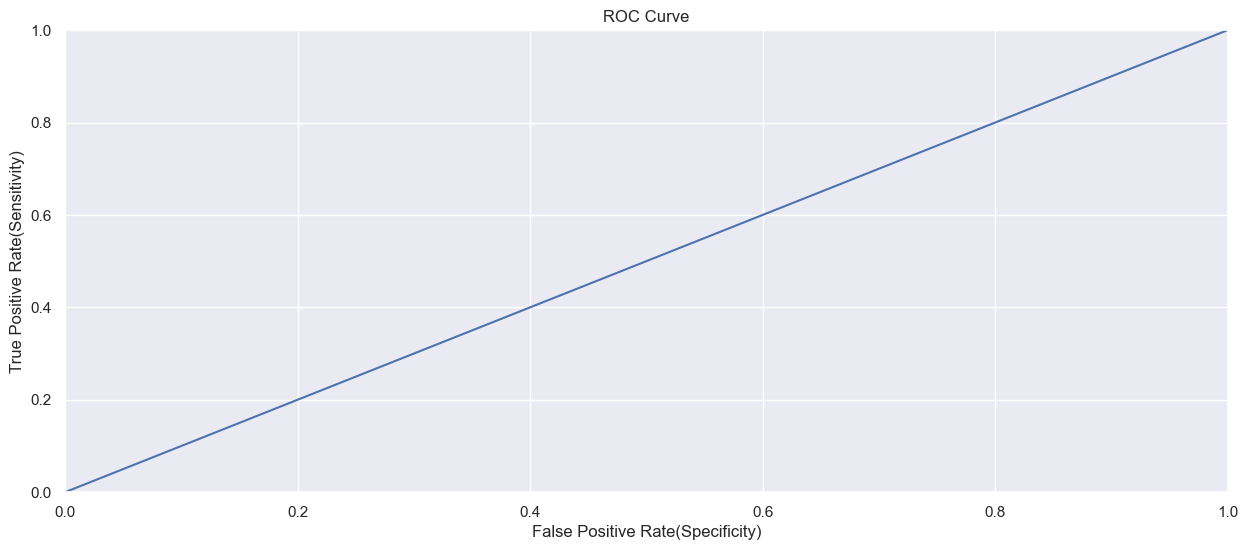

0.5

In [189]:
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# HANDLING CLASS IMBALANCE-M1

In [190]:
DF_M1=DF[['TOTAL_NO_OF_MONTHS','CNT_CHILDREN','DAYS_BIRTH','FLAG_MOBIL','CNT_FAM_MEMBERS','FLAG_EMPLOYED','GOOD_OR_BAD']]
DF_M1_CLASS0=DF_M1[DF_M1['GOOD_OR_BAD']==0]
DF_M1_CLASS1=DF_M1[DF_M1['GOOD_OR_BAD']==1]

We will use all three methods for treating CLASS IMBALANCE

Oversampling of Inferior Class-CLASS0
<br>Undersampling of Superior Class-CLASS1
<br>SMOTE-Synthetic Minority Oversampling Technique

In [191]:
# Over Sampling of Inferior Class
DF_M1_CLASS0=DF_M1_CLASS0.sample(int(10*len(DF_M1[DF_M1['GOOD_OR_BAD']==0])),replace=True)
# Under Sampling of Superior Class
DF_M1_CLASS1=DF_M1_CLASS1.sample(int(.8*len(DF_M1[DF_M1['GOOD_OR_BAD']==1])),replace=True)
DF_M1_BAL=pd.concat([DF_M1_CLASS0,DF_M1_CLASS1])
DF_M1_BAL['GOOD_OR_BAD'].value_counts()

GOOD_OR_BAD
1    28672
0     6160
Name: count, dtype: int64

In [192]:
#Let's now move to SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.8,random_state = 2)
DF_M1_X_BAL, DF_M1_y_BAL = smote.fit_resample(DF_M1_BAL.drop('GOOD_OR_BAD',axis=1), DF_M1_BAL[['GOOD_OR_BAD']])

DF_M1_BAL=DF_M1_X_BAL
DF_M1_BAL['GOOD_OR_BAD']=DF_M1_y_BAL

print("\nNew class distribution after SMOTE:")
print(DF_M1_BAL['GOOD_OR_BAD'].value_counts())


New class distribution after SMOTE:
GOOD_OR_BAD
1    28672
0    22937
Name: count, dtype: int64


M1-AFTER HANDLING CLASS IMBALANCE

In [193]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + CNT_CHILDREN + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"

FINDINGS- AS FLAG MOBILE CONTAINS ONLY 1, SO IT IS CREATING A SINGULAR MATRIX, SO REMOVING IT, AFTER REMOVING, WHILE VALIDATING THE MODEL, WE FOUND THAT CNT_CHILDREN HAS P>|Z| ASGREATER THAN 0.05 SO WILL DROP THAT ALSO

In [194]:
import statsmodels.formula.api as sm

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.614068
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51603
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1061
Time:                        11:31:24   Log-Likelihood:                -31691.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6112      0.077      7.891      0.000       0.459       0.763
TOTAL

In [195]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS  + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"
import statsmodels.formula.api as sm

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())
predictions = results.predict()
predictions

Optimization terminated successfully.
         Current function value: 0.614271
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51604
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1058
Time:                        11:31:24   Log-Likelihood:                -31702.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6887      0.076      9.113      0.000       0.541       0.837
TOTAL

array([0.21611325, 0.75887248, 0.27892759, ..., 0.43627869, 0.37616554,
       0.24686531])

In [196]:
logistic= LogisticRegression()
DF_M1_X=DF_M1_X_BAL.drop(['FLAG_MOBIL','GOOD_OR_BAD','CNT_CHILDREN'],axis=1)
DF_M1_y=DF_M1_X_BAL[['GOOD_OR_BAD']]
MODEL_M1=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [0.68913201]
Coefficients [[-4.99188020e-02 -2.90616220e-05  9.85982303e-02  2.43634815e-01]]


c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
PREDICT_M1=logistic.predict(DF_M1_X)
PREDICT_M1

CM_M1 = confusion_matrix(DF_M1_y,PREDICT_M1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[12523 10414]
 [ 6797 21875]]
SENSITIVITY: 0.5459737541962768
SPECIFICITY: 0.762939453125
ACCURACY: 0.6665116549439052
PRECISION_CLASS0 :  0.6481884057971015
RECALL_CLASS0 :  0.5459737541962768
F1_CLASS0 :  0.5927065338287147
PRECISION_CLASS1 :  0.6774753011861625
RECALL_CLASS1 :  0.762939453125
F1_CLASS1 :  0.7176719542002263


In [198]:
from sklearn.metrics import classification_report
print(classification_report(DF_M1_y,PREDICT_M1))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59     22937
           1       0.68      0.76      0.72     28672

    accuracy                           0.67     51609
   macro avg       0.66      0.65      0.66     51609
weighted avg       0.66      0.67      0.66     51609



false_positive_rate [0. 0. 0. ... 1. 1. 1.]
true_positive_rate [0.00000000e+00 3.48772321e-05 1.04631696e-04 ... 9.99895368e-01
 9.99965123e-01 1.00000000e+00]
thresholds [       inf 0.87008241 0.86433456 ... 0.15238093 0.15133279 0.15038618]


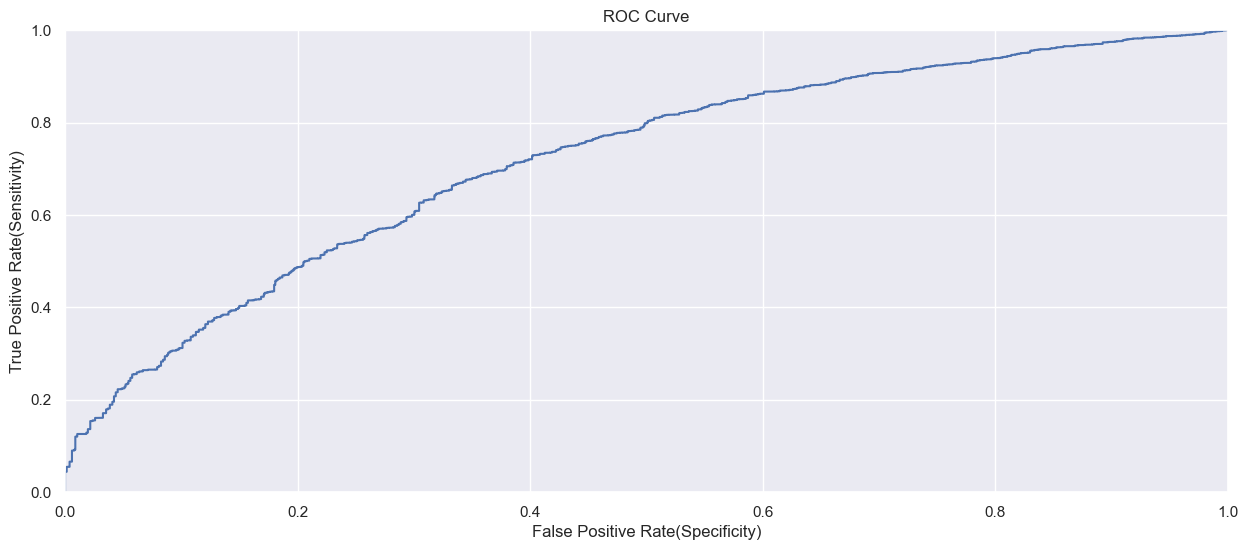

0.7175533187834184

In [199]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_BAL[['GOOD_OR_BAD']], predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ADJUSTING THRESHOLD-M1
=====================

FINDINGS- By changing the threshold to .7, we could increase the sensitivity, However the AUC is decreasing

DATA WITH THRESHOLD=0.5

<br>SENSITIVITY: 0.5900074116057026
<br>SPECIFICITY: 0.7156110491071429
<br>ACCURACY: 0.6597880214691236
<br>PRECISION_CLASS0 : 0.6240143864988241
<br>RECALL_CLASS0 : 0.5900074116057026
<br>F1_CLASS0 : 0.606534600215131
<br>PRECISION_CLASS1 : 0.6857161954414812
<br>RECALL_CLASS1 : 0.7156110491071429
<br>F1_CLASS1 : 0.7003447451957538
<br>AUC : 0.7242620700251738

DATA WITH THRESHOLD=0.7

<br>SENSITIVITY: 0.8642368226010376
<br>SPECIFICITY: 0.43812779017857145
<br>ACCURACY: 0.6275068302040342
<br>PRECISION_CLASS0 : 0.551665599866418
<br>RECALL_CLASS0 : 0.8642368226010376
<br>F1_CLASS0 : 0.6734499745201291
<br>PRECISION_CLASS1 : 0.8013523858127073
<br>RECALL_CLASS1 : 0.43812779017857145
<br>F1_CLASS1 : 0.566519346982953
<br>AUC : 0.6511823063898046

[[19330  3607]
 [16795 11877]]
SENSITIVITY: 0.8427431660635654
SPECIFICITY: 0.4142368861607143
ACCURACY: 0.6046813540273983
PRECISION_CLASS0 :  0.5350865051903114
RECALL_CLASS0 :  0.8427431660635654
F1_CLASS0 :  0.654566387863601
PRECISION_CLASS1 :  0.7670498579178506
RECALL_CLASS1 :  0.4142368861607143
F1_CLASS1 :  0.5379563366246942


0.6284900261121399

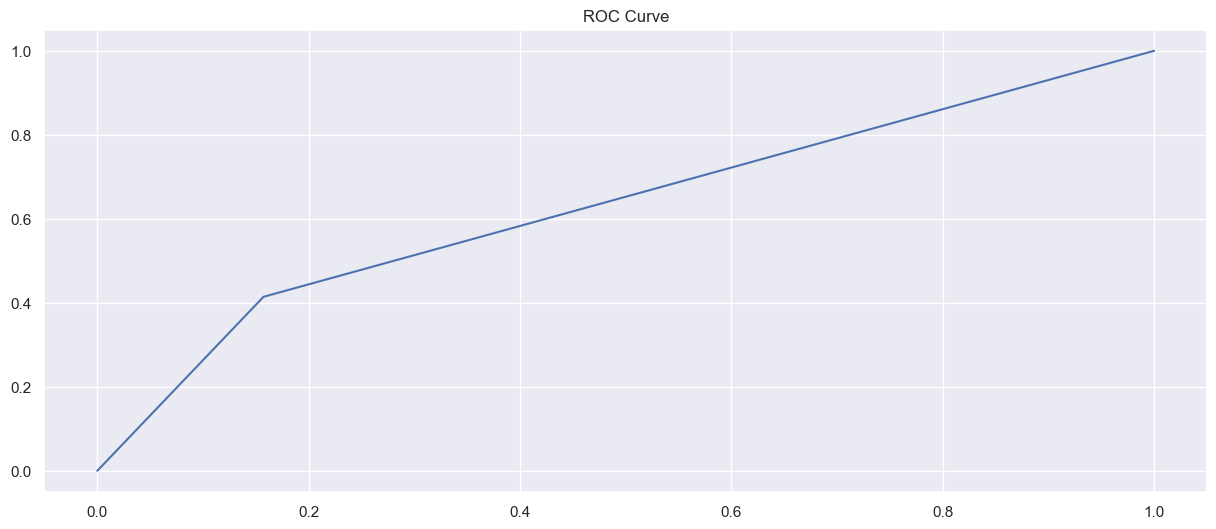

In [200]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.7
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

CM_M1 = confusion_matrix(DF_M1_y,predicted_class1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )


false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_BAL[['GOOD_OR_BAD']], predicted_class1)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

RANK ORDERING-M1

In [201]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS  + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())
predictions = results.predict()
predictions

Optimization terminated successfully.
         Current function value: 0.614271
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51604
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1058
Time:                        11:31:25   Log-Likelihood:                -31702.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6887      0.076      9.113      0.000       0.541       0.837
TOTAL

array([0.21611325, 0.75887248, 0.27892759, ..., 0.43627869, 0.37616554,
       0.24686531])

In [202]:
DF_M1

,TOTAL_NO_OF_MONTHS,CNT_CHILDREN,DAYS_BIRTH,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_EMPLOYED,GOOD_OR_BAD
0,16,0,-12005,1,2.0,1,1
1,15,0,-12005,1,2.0,1,1
2,30,0,-21474,1,2.0,1,1
3,5,0,-19110,1,1.0,1,1
4,5,0,-19110,1,1.0,1,1
...,...,...,...,...,...,...,...
36452,18,1,-10808,1,3.0,1,1
36453,18,1,-10808,1,3.0,1,1
36454,13,1,-10808,1,3.0,1,1
36455,2,1,-10808,1,3.0,1,1


DECISION TREE(BEFORE FEATURE ENGINEERING)

|--- TOTAL_NO_OF_MONTHS <= 33.50
|   |--- TOTAL_NO_OF_MONTHS <= 9.50
|   |   |--- TOTAL_NO_OF_MONTHS <= 4.50
|   |   |   |--- class: 1
|   |   |--- TOTAL_NO_OF_MONTHS >  4.50
|   |   |   |--- DAYS_BIRTH <= -24595.50
|   |   |   |   |--- class: 0
|   |   |   |--- DAYS_BIRTH >  -24595.50
|   |   |   |   |--- DAYS_BIRTH <= -22113.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DAYS_BIRTH >  -22113.00
|   |   |   |   |   |--- DAYS_BIRTH <= -22110.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DAYS_BIRTH >  -22110.00
|   |   |   |   |   |   |--- class: 1
|   |--- TOTAL_NO_OF_MONTHS >  9.50
|   |   |--- TOTAL_NO_OF_MONTHS <= 25.50
|   |   |   |--- DAYS_BIRTH <= -17580.00
|   |   |   |   |--- DAYS_BIRTH <= -17602.00
|   |   |   |   |   |--- TOTAL_NO_OF_MONTHS <= 16.50
|   |   |   |   |   |   |--- DAYS_BIRTH <= -23812.00
|   |   |   |   |   |   |   |--- DAYS_BIRTH <= -23908.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- DAYS_BIRTH

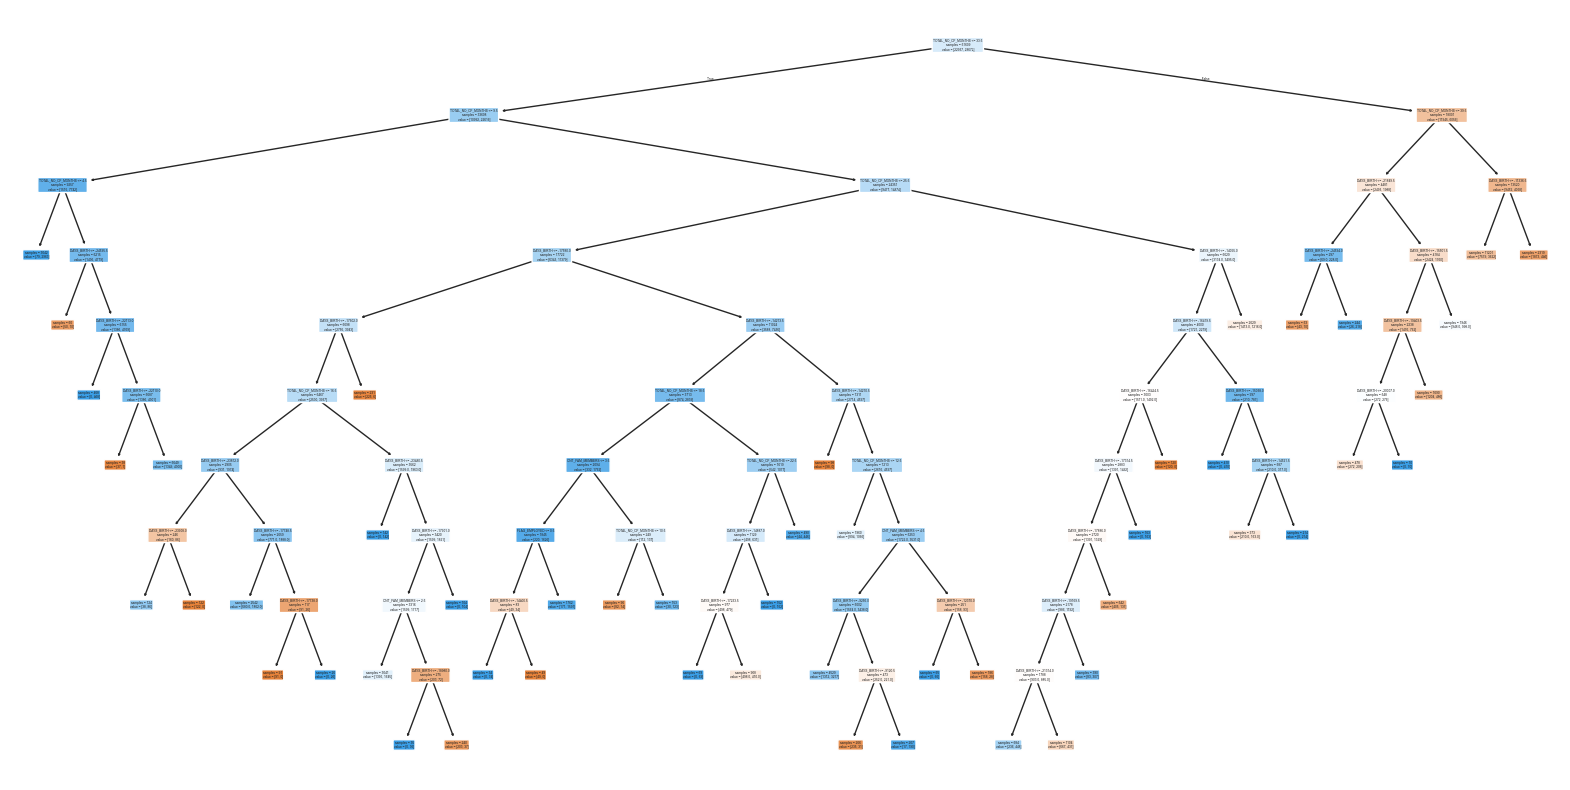

In [203]:
from sklearn import tree

#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 50)
DTree.fit(DF_M1_X,DF_M1_y)

##Plotting the trees
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(DF_M1_X.columns))
print( export_text(DTree, feature_names = list(DF_M1_X.columns)))

TREE VALIDATION

FINDINGS-We noticed that in general, the train and test accuracy was almost similar about 89% and the sensitivity also increased, however when tested across the real data there was a huge difference of about 10% which we found. We will try FEATURE ENGINEERING NEXT and build our second model

In [204]:
#Tree Validation
predict1 = DTree.predict(DF_M1_X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(DF_M1_y, predict1)
print(CM_M1)

CM_M1 = confusion_matrix(DF_M1_y,predict1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[15634  7303]
 [ 7260 21412]]
[[15634  7303]
 [ 7260 21412]]
SENSITIVITY: 0.681606138553429
SPECIFICITY: 0.7467912946428571
ACCURACY: 0.7178205351779728
PRECISION_CLASS0 :  0.68288634576745
RECALL_CLASS0 :  0.681606138553429
F1_CLASS0 :  0.6822456415962994
PRECISION_CLASS1 :  0.7456729932091242
RECALL_CLASS1 :  0.7467912946428571
F1_CLASS1 :  0.7462317249551291


In [205]:
DF_REAL_DATA=DF[['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED','GOOD_OR_BAD']]
DF_M1_BAL_TRAIN_TEST=DF_M1_BAL.drop(['FLAG_MOBIL','CNT_CHILDREN'],axis=1)

In [206]:
print(DF_REAL_DATA.columns)
print(DF_M1_BAL_TRAIN_TEST.columns)

Index(['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED',
       'GOOD_OR_BAD'],
      dtype='object')
Index(['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED',
       'GOOD_OR_BAD'],
      dtype='object')


In [207]:
X_REAL_DATA=DF_REAL_DATA.drop('GOOD_OR_BAD',axis=1)
y_REAL_DATA=DF_REAL_DATA[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_REAL_DATA,y_REAL_DATA, train_size = 0.8 , random_state=333)

In [208]:
X_BAL_DATA=DF_M1_BAL_TRAIN_TEST.drop('GOOD_OR_BAD',axis=1)
y_BAL_DATA=DF_M1_BAL_TRAIN_TEST[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_BAL_DATA,y_BAL_DATA, train_size = 0.8 , random_state=333)

In [209]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 150)
DTree.fit(X_train_bal,y_train_bal)


predict1 = DTree.predict(X_train_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(y_train_bal, predict1)


SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('TRAIN DATA PARAMETERS \n')
print(CM_M1)
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

TRAIN DATA PARAMETERS 

[[15812  2532]
 [ 5193 17750]]
SENSITIVITY: 0.8619712167466201
SPECIFICITY: 0.7736564529486117
ACCURACY: 0.8128951001525904
PRECISION_CLASS0 :  0.7527731492501786
RECALL_CLASS0 :  0.8619712167466201
F1_CLASS0 :  0.8036798902132201
PRECISION_CLASS1 :  0.8751602406074351
RECALL_CLASS1 :  0.7736564529486117
F1_CLASS1 :  0.821283979178716


In [210]:
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 150)
DTree.fit(X_train_bal,y_train_bal)


predict1 = DTree.predict(X_test_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(y_test_bal, predict1)


SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('TEST DATA PARAMETERS \n')
print(CM_M1)
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

TEST DATA PARAMETERS 

[[3899  694]
 [1315 4414]]
SENSITIVITY: 0.8489005007620292
SPECIFICITY: 0.7704660499214523
ACCURACY: 0.8053671769037009
PRECISION_CLASS0 :  0.7477943996931339
RECALL_CLASS0 :  0.8489005007620292
F1_CLASS0 :  0.7951463240542469
PRECISION_CLASS1 :  0.8641346906812842
RECALL_CLASS1 :  0.7704660499214523
F1_CLASS1 :  0.8146165913075575


# FEATURE ENGINEERING

APPLYING LABEL ENCODING ON ALL FLAGS
<br>FLAG_GENDER
<br>FLAG_OWN_CAR
<br>FLAG_OWN_REALTY
<br>NAME_EDUCATION_TYPE

In [211]:
# APPLYING LABEL ENCODING ON ALL FLAGS
# CONVERTING CODE_GENDER FORM M,F TO 1,0 FOR PREDICTIVE MODELLING
DF_FE=DF.drop(columns=['ID','1_MONTH_LATE','2_MONTH_LATE','3_MONTH_LATE','4_MONTH_LATE','5_MONTH_LATE','OVERDUE_BAD_DEBT','PAID_OFF','NO_LOAN'])
DF_FE['FLAG_GENDER']=1
DF_FE['FLAG_GENDER'][DF['CODE_GENDER']=='F']=0

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\609351186.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DF_FE['FLAG_GENDER'][DF['CODE_GENDER']=='F']=0
C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\609351186.py:5: SettingWithCopyW

In [212]:
# CONVERTING FLAG_OWN_CAR FORM Y,N TO 1,0 FOR PREDICTIVE MODELLING
DF_FE[['FLAG_OWN_CAR']]= DF_FE[['FLAG_OWN_CAR']].replace(['N','Y'],[0,1])

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\4182434283.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_FE[['FLAG_OWN_CAR']]= DF_FE[['FLAG_OWN_CAR']].replace(['N','Y'],[0,1])


In [213]:
# CONVERTING FLAG_OWN_REALTY FORM Y,N TO 1,0 FOR PREDICTIVE MODELLING
DF_FE[['FLAG_OWN_REALTY']]=DF_FE[['FLAG_OWN_REALTY']].replace(['N','Y'],[0,1])

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1303135932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_FE[['FLAG_OWN_REALTY']]=DF_FE[['FLAG_OWN_REALTY']].replace(['N','Y'],[0,1])


In [214]:
# CONVERTING VALUES TO INTEGER TYPE
DF_FE = DF_FE.astype({"CNT_FAM_MEMBERS":'int',"AMT_INCOME_TOTAL_NEW":'int'})

In [215]:
# CONVERTING NAME_EDUCATION_TYPE AS PER THE FOLLOWING ORDER
# Lower secondary-0
# Secondary / secondary special-1
# Incomplete higher-2
# Higher education-3
# Academic degree-4

DF_FE[['NAME_EDUCATION_TYPE']]=DF_FE[['NAME_EDUCATION_TYPE']].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4])
DF_FE[['NAME_EDUCATION_TYPE']].value_counts()

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\3770480382.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_FE[['NAME_EDUCATION_TYPE']]=DF_FE[['NAME_EDUCATION_TYPE']].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4])


NAME_EDUCATION_TYPE
1                      24777
3                       9864
2                       1410
0                        374
4                         32
Name: count, dtype: int64

In [216]:
DF_FE.dtypes

TOTAL_NO_OF_MONTHS       int32
GOOD_OR_BAD              int64
CODE_GENDER             object
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int32
AMT_INCOME_TOTAL_NEW     int32
FLAG_EMPLOYED            int64
FLAG_GENDER              int64
dtype: object

CALCULATING YEARS OF EMPLOYMENT FROM DAYS_EMPLOYED

In [217]:
#FOR DAYS EMPLOYED, PEOPLE WHO HAVE DAYS EMPLOYED AS +VE WILL BE COUNTED AS 0
#FOR PEOPLE WITH -VE DAYS EMPLOYED, IT WILL BE COUNTED AS YEARS BY DIVIDING THE YEARS WITH 365
DF_FE['DAYS_EMPLOYED']
DF_FE['YEARS_OF_EMPLOYMENT']=0
DF_FE['YEARS_OF_EMPLOYMENT'][DF['DAYS_EMPLOYED']<0]=round((DF['DAYS_EMPLOYED']/365)*-1,0).astype(int)
DF_FE['YEARS_OF_EMPLOYMENT'].unique()

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\1462818965.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DF_FE['YEARS_OF_EMPLOYMENT'][DF['DAYS_EMPLOYED']<0]=round((DF['DAYS_EMPLOYED']/365)*-1,0).astype(int)
C:\Users\Legion\AppData\Lo

array([12,  3,  8,  0,  2,  4,  6,  9, 19, 15,  5, 13,  7, 17, 30, 16, 11,
        1, 10, 24, 14, 25, 20, 27, 18, 21, 23, 22, 28, 39, 32, 33, 37, 26,
       38, 31, 29, 35, 34, 41, 40, 36, 42, 43], dtype=int64)

CALCULATING AGE FROM DAYS_BIRTH

In [218]:
#FOR AGE, PEOPLE WHO HAVE DAYS_BIRTH AS +VE WILL BE COUNTED AS 0
#FOR PEOPLE WITH -VE DAYS_BIRTH IT WILL BE COUNTED AS YEARS BY DIVIDING THE YEARS WITH 365
DF_FE['DAYS_BIRTH']
DF_FE['AGE']=0
DF_FE['AGE'][DF['DAYS_BIRTH']<0]=round((DF['DAYS_BIRTH']/365)*-1,0).astype(int)
DF_FE['AGE'].unique()

C:\Users\Legion\AppData\Local\Temp\ipykernel_7436\2173867443.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DF_FE['AGE'][DF['DAYS_BIRTH']<0]=round((DF['DAYS_BIRTH']/365)*-1,0).astype(int)
C:\Users\Legion\AppData\Local\Temp\ipykernel_743

array([33, 59, 52, 62, 46, 49, 29, 51, 27, 30, 35, 32, 56, 43, 44, 34, 55,
       47, 37, 42, 28, 61, 57, 45, 54, 40, 39, 48, 24, 21, 36, 26, 50, 63,
       58, 41, 60, 64, 31, 38, 53, 22, 23, 25, 65, 67, 66, 69, 68],
      dtype=int64)

In [219]:
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AMT_INCOME_TOTAL_NEW', 'FLAG_EMPLOYED', 'FLAG_GENDER',
       'YEARS_OF_EMPLOYMENT', 'AGE'],
      dtype='object')

DROPPING THE VALUES WHICH ARE NOT IN USE OR ALREADY ENGINEERED AND REPLACED

DROPPING FLAG_MOBIL AS IT IS A SINGULAR MATRIX

In [220]:
DF_FE=DF_FE.drop(['CODE_GENDER','DAYS_EMPLOYED','DAYS_BIRTH','FLAG_MOBIL'],axis=1)
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AMT_INCOME_TOTAL_NEW', 'FLAG_EMPLOYED', 'FLAG_GENDER',
       'YEARS_OF_EMPLOYMENT', 'AGE'],
      dtype='object')

In [221]:
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW,FLAG_EMPLOYED,FLAG_GENDER,YEARS_OF_EMPLOYMENT,AGE
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,0,0,Missing NA,2,427500,1,1,12,33
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,0,0,Missing NA,2,427500,1,1,12,33
2,30,1,1,1,0,Working,1,Married,House / apartment,0,0,0,Security staff,2,112500,1,1,3,59
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,1,1,Sales staff,1,270000,1,0,8,52
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,1,1,Sales staff,1,270000,1,0,8,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30


APPLYING ONE HOT ENCODING TO CONVERT CATEGORICAL VARIABLES INTO NUMERIC

NAME_INCOME_TYPE
<br>NAME_FAMILY_STATUS
<br>NAME_HOUSING_TYPE
<br>OCCUPATION_TYPE

DF_FE['NAME_INCOME_TYPE']

In [222]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_INCOME_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)

DF_FE.rename(columns={'Commercial associate':'COMMERCIAL_ASSOCIATE',
                     'Pensioner':'PENSIONER','State servant':'STATE_SERVANT','Student':'STUDENT',
                     'Working':'WORKING'},inplace=True)
DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,AMT_INCOME_TOTAL_NEW,FLAG_EMPLOYED,FLAG_GENDER,YEARS_OF_EMPLOYMENT,AGE,COMMERCIAL_ASSOCIATE,PENSIONER,STATE_SERVANT,STUDENT,WORKING
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,427500,1,1,12,33,0,0,0,0,1
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,427500,1,1,12,33,0,0,0,0,1
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,112500,1,1,3,59,0,0,0,0,1
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,270000,1,0,8,52,1,0,0,0,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,270000,1,0,8,52,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1


DF_FE['NAME_FAMILY_STATUS']

In [223]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_FAMILY_STATUS']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Civil marriage':'CIVIL_MARRIAGE','Married':'MARRIED','Separated':'SEPARATED',
                     'Lower secondary':'LOWER_SECONDARY',
                      'Single / not married':'SINGLE_NOT_MARRIED','Widow':'WIDOW'},inplace=True)
DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,COMMERCIAL_ASSOCIATE,PENSIONER,STATE_SERVANT,STUDENT,WORKING,CIVIL_MARRIAGE,MARRIED,SEPARATED,SINGLE_NOT_MARRIED,WIDOW
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0


DF_FE['NAME_HOUSING_TYPE']

In [224]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_HOUSING_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Co-op apartment':'CO_OP_APARTMENT','House / apartment':'HOUSE_APARTMENT',
                      'Municipal apartment':'MUNICIPAL_APARTMENT','Office apartment':'OFFICE_APARTMENT',
                      'Rented apartment':'RENTED_APARTMENT','With parents':'WITH_PARENTS'},inplace=True)

DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,MARRIED,SEPARATED,SINGLE_NOT_MARRIED,WIDOW,CO_OP_APARTMENT,HOUSE_APARTMENT,MUNICIPAL_APARTMENT,OFFICE_APARTMENT,RENTED_APARTMENT,WITH_PARENTS
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,0,0,0,0,1,0
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,0,0,0,0,1,0
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,0,0,1,0,0,1,0,0,0,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0


In [225]:
DF_ONE_HOT=pd.get_dummies(DF_FE['OCCUPATION_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Accountants':'ACCOUNTANTS','Cleaning staff':'CLEANING_STAFF','Cooking staff':'COOKING_STAFF',
                     'Core staff':'CORE_STAFF','Drivers':'DRIVERS','HR staff':'HR_STAFF',
                     'High skill tech staff':'HIGH_SKILL_TECH_STAFF','IT staff':'IT_STAFF','Laborers':'LABOURERS',
                     'Low-skill Laborers':'LOW_SKILL_LABOURERS','Managers':'MANAGERS',
                     'Medicine staff':'MEDICINE_STAFF','Missing NA':'MISSING_NA',
                     'Private service staff':'PRIVATE_SERVICE_STAFF','Realty agents':'REALTY_AGENTS',
                     'Sales staff':'SALES_STAFF','Secretaries':'SECRETARIES','Security staff':'SECURITY_STAFF',
                     'Waiters/barmen staff':'WAITER_BARMEN_STAFF'},inplace=True)

In [226]:
DF_FE=DF_FE.drop(['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'],axis=1)
print('So far the number of FEATURES:', len(DF_FE.columns))

So far the number of FEATURES: 50


In [227]:
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

# MODEL M2
METHOD-Logistic Regression & Decision Tree

METHODOLOGY-Building the model after doing FEATURE ENGINEERING

PACKAGE-sklearn & statsmodel

**METHOD-LOGISTIC REGRESSION**

In [228]:
logistic= LogisticRegression()
logistic.fit(DF_FE.drop('GOOD_OR_BAD',axis=1),DF_FE[['GOOD_OR_BAD']])
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.1554506]
Coefficients [[-4.31184775e-02  7.25589636e-02  1.11442222e-01  1.51883896e-01
   2.49872373e-01  6.69624623e-02  2.81836197e-02  3.16937560e-02
   4.50015304e-01  1.69692224e-06  2.14595456e-01  3.55945414e-02
   4.38950745e-02  5.86053502e-02  5.72713578e-02 -7.90948836e-02
   1.99310721e-02  2.53756357e-04  1.57073157e-01  3.12704388e-02
   1.24580640e-01  2.98163344e-03  3.30711716e-02 -3.64694250e-02
   1.09107216e-03  1.12713402e-01 -8.88049879e-03 -5.12614240e-03
   8.65160366e-03  4.69850227e-02  5.15489201e-03  4.10871995e-03
   1.07797793e-02  1.99573465e-02 -1.29493916e-03  1.18049521e-03
  -3.32373430e-03 -1.02458388e-03  5.15561925e-02 -3.24423692e-03
  -5.60795558e-03  1.50258991e-02 -1.31600477e-02  4.61868053e-03
   1.08773751e-03  6.53545102e-02  2.37034138e-03 -1.65492527e-03
   3.55028783e-03]]


c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [229]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [230]:
model_formula=ols_formula(DF_FE, dependent_var="GOOD_OR_BAD")
print('Model Formula\n',model_formula)

Model Formula
 GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + FLAG_OWN_CAR + FLAG_OWN_REALTY + CNT_CHILDREN + NAME_EDUCATION_TYPE + FLAG_WORK_PHONE + FLAG_PHONE + FLAG_EMAIL + CNT_FAM_MEMBERS + AMT_INCOME_TOTAL_NEW + FLAG_EMPLOYED + FLAG_GENDER + YEARS_OF_EMPLOYMENT + AGE + COMMERCIAL_ASSOCIATE + PENSIONER + STATE_SERVANT + STUDENT + WORKING + CIVIL_MARRIAGE + MARRIED + SEPARATED + SINGLE_NOT_MARRIED + WIDOW + CO_OP_APARTMENT + HOUSE_APARTMENT + MUNICIPAL_APARTMENT + OFFICE_APARTMENT + RENTED_APARTMENT + WITH_PARENTS + ACCOUNTANTS + CLEANING_STAFF + COOKING_STAFF + CORE_STAFF + DRIVERS + HR_STAFF + HIGH_SKILL_TECH_STAFF + IT_STAFF + LABOURERS + LOW_SKILL_LABOURERS + MANAGERS + MEDICINE_STAFF + MISSING_NA + PRIVATE_SERVICE_STAFF + REALTY_AGENTS + SALES_STAFF + SECRETARIES + SECURITY_STAFF + WAITER_BARMEN_STAFF


In [231]:
print(len(DF_FE.columns))
DF_FE.columns

50


Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

MULTICOLLINEARITY-M2
--------------------

In [232]:
#MULTICOLLINEARITY CHECK
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

CHECKING MULTICOLLINEARITY

NOTE TO SELF- Whenever there is inf for all values of a cluster after Feature Engineering, then VIF should be checked for each group separately.

For Example for OCCUPATION_TYPE we got these many distinct values

OCCUPATION_TYPE

Missing NA 11323 Laborers 6211 Core staff 3591 Sales staff 3485 Managers 3012 Drivers 2138 High skill tech staff 1383 Accountants 1241 Medicine staff 1207 Cooking staff 655 Security staff 592 Cleaning staff 551 Private service staff 344 Low-skill Laborers 175 Waiters/barmen staff 174 Secretaries 151 HR staff 85 Realty agents 79 IT staff 60

However while checking VIF collectively, all came as inf. So one value needs to be dropped first to check the highest VIF as after dropping one value VIF will change into number and then replace the original Variable which was dropped with the Variable having highest VIF and then continue the process.

Same needs to be done with all categorical fields converted to 1,0 by ONE HOT ENCODING

In [233]:
vif_cal(input_data=DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1), dependent_col="GOOD_OR_BAD")

TOTAL_NO_OF_MONTHS  VIF =  1.02
FLAG_OWN_CAR  VIF =  1.23
FLAG_OWN_REALTY  VIF =  1.11
CNT_CHILDREN  VIF =  1.15
NAME_EDUCATION_TYPE  VIF =  1.23
FLAG_WORK_PHONE  VIF =  1.26
FLAG_PHONE  VIF =  1.13
FLAG_EMAIL  VIF =  1.04
AMT_INCOME_TOTAL_NEW  VIF =  1.24
FLAG_EMPLOYED  VIF =  3.33
FLAG_GENDER  VIF =  1.57
YEARS_OF_EMPLOYMENT  VIF =  1.47
AGE  VIF =  2.21
COMMERCIAL_ASSOCIATE  VIF =  1.18
STATE_SERVANT  VIF =  1.18
STUDENT  VIF =  1.0
CIVIL_MARRIAGE  VIF =  1.03
SEPARATED  VIF =  1.03
WIDOW  VIF =  1.09
CO_OP_APARTMENT  VIF =  1.01
MUNICIPAL_APARTMENT  VIF =  1.03
OFFICE_APARTMENT  VIF =  1.01
RENTED_APARTMENT  VIF =  1.02
WITH_PARENTS  VIF =  1.08
ACCOUNTANTS  VIF =  1.23
CLEANING_STAFF  VIF =  1.13
COOKING_STAFF  VIF =  1.12
CORE_STAFF  VIF =  1.58
DRIVERS  VIF =  1.49
HR_STAFF  VIF =  1.02
HIGH_SKILL_TECH_STAFF  VIF =  1.22
IT_STAFF  VIF =  1.01
LABOURERS  VIF =  1.95
LOW_SKILL_LABOURERS  VIF =  1.05
MANAGERS  VIF =  1.54
MEDICINE_STAFF  VIF =  1.25
PRIVATE_SERVICE_STAFF  VIF =  1.

**CHECKING INDIVIDUAL VARIABLE IMPACT**
---------------------------------------
DROPPING THE VARIABLES WHERE MULTICOLLINEARITY WAS FOUND

In [234]:
# model_formula=ols_formula(DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1), dependent_var="GOOD_OR_BAD")
# print('Model Formula\n',model_formula)
DF_M2_NEW=DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1)
M2=sm.logit('GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + FLAG_OWN_CAR + FLAG_OWN_REALTY + CNT_CHILDREN + NAME_EDUCATION_TYPE + FLAG_WORK_PHONE + FLAG_PHONE + FLAG_EMAIL + AMT_INCOME_TOTAL_NEW + FLAG_EMPLOYED + FLAG_GENDER + YEARS_OF_EMPLOYMENT + AGE + COMMERCIAL_ASSOCIATE + STATE_SERVANT + STUDENT + CIVIL_MARRIAGE + SEPARATED + WIDOW + CO_OP_APARTMENT + MUNICIPAL_APARTMENT + OFFICE_APARTMENT + RENTED_APARTMENT + WITH_PARENTS + ACCOUNTANTS + CLEANING_STAFF + COOKING_STAFF + CORE_STAFF + DRIVERS + HR_STAFF + HIGH_SKILL_TECH_STAFF + IT_STAFF + LABOURERS + LOW_SKILL_LABOURERS + MANAGERS + MEDICINE_STAFF + PRIVATE_SERVICE_STAFF + REALTY_AGENTS + SALES_STAFF + SECRETARIES + SECURITY_STAFF + WAITER_BARMEN_STAFF',
            data=DF_M2_NEW)
results=M2.fit()
print(results.summary())

         Current function value: 0.079025
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36414
Method:                           MLE   Df Model:                           42
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 0.07791
Time:                        11:38:39   Log-Likelihood:                -2881.0
converged:                      False   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 4.620e-77
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.8786      0.350     13.922      0.000       4.192       5.565
TOTAL_NO_OF_MONTHS       -0.0484

c:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [235]:
DF_M2_FINAL=DF_M2_NEW[['TOTAL_NO_OF_MONTHS','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_GENDER','YEARS_OF_EMPLOYMENT','WIDOW','MUNICIPAL_APARTMENT','CORE_STAFF','GOOD_OR_BAD']]

In [236]:
import statsmodels.api as sm
DF_M2_FE_X=DF_M2_FINAL.drop('GOOD_OR_BAD',axis=1)
DF_M2_FE_y=DF_M2_FINAL[['GOOD_OR_BAD']]
M2_STATSMODEL=sm.Logit(DF_M2_FE_y,DF_M2_FE_X)
M2_STATSMODEL.fit()
print(M2_STATSMODEL.fit().summary())

Optimization terminated successfully.
         Current function value: 0.123354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.123354
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36449
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 -0.4393
Time:                        11:39:54   Log-Likelihood:                -4497.1
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [237]:
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

HANDLING CLASS IMBALANCE IN M2

We will use only one  methods for treating CLASS IMBALANCE

1.   SMOTE-Synthetic Minority Oversampling Technique

In [238]:
#Let's now move to SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.8,random_state = 2)
DF_M2_FE_X_BAL, DF_M2_FE_y_BAL = smote.fit_resample(DF_FE.drop('GOOD_OR_BAD',axis=1), DF_FE[['GOOD_OR_BAD']])

print('BAD CUSTOMERS:',len(DF_M2_FE_y_BAL[DF_M2_FE_y_BAL['GOOD_OR_BAD']==0]))
print('GOOD CUSTOMERS:',len(DF_M2_FE_y_BAL[DF_M2_FE_y_BAL['GOOD_OR_BAD']==1]))

DF_M2_FE_BAL=DF_M2_FE_X_BAL
DF_M2_FE_BAL['GOOD_OR_BAD']=DF_M2_FE_y_BAL
DF_M2_FE_BAL[['GOOD_OR_BAD']]

BAD CUSTOMERS: 28672
GOOD CUSTOMERS: 35841


,GOOD_OR_BAD
0,1
1,1
2,1
3,1
4,1
...,...
64508,0
64509,0
64510,0
64511,0


**DECISION TREE AFTER FEATURE ENGINEERING**

In [239]:
#REAL DATA SPLIT INTO TEST AND TRAIN
X_REAL_DATA=DF_FE.drop('GOOD_OR_BAD',axis=1)
y_REAL_DATA=DF_FE[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_REAL_DATA,y_REAL_DATA, train_size = 0.8 , random_state=333)

len(X_test_real.columns)

49

In [240]:
#BALANCED DATA SPLIT INTO TEST AND TRAIN
X_BAL_DATA=DF_M2_FE_BAL.drop('GOOD_OR_BAD',axis=1)
y_BAL_DATA=DF_M2_FE_BAL[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_BAL_DATA,y_BAL_DATA, train_size = 0.8 , random_state=333)
len(X_test_bal.columns)
X_train_bal

,TOTAL_NO_OF_MONTHS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW,...,LOW_SKILL_LABOURERS,MANAGERS,MEDICINE_STAFF,MISSING_NA,PRIVATE_SERVICE_STAFF,REALTY_AGENTS,SALES_STAFF,SECRETARIES,SECURITY_STAFF,WAITER_BARMEN_STAFF
8773,61,0,1,1,1,0,0,0,3,135000,...,0,0,0,1,0,0,0,0,0,0
39584,11,0,0,0,1,0,0,1,2,92203,...,0,0,0,1,0,0,0,0,0,0
57030,22,0,0,0,2,0,0,0,2,177263,...,0,0,0,0,0,0,0,0,0,0
59878,32,1,0,0,1,0,0,0,2,157500,...,0,0,0,0,0,0,0,0,0,0
41326,51,0,1,0,1,0,0,0,2,67500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22451,3,0,1,0,3,0,0,0,2,130500,...,0,0,0,1,0,0,0,0,0,0
58787,5,0,1,0,2,0,0,0,1,67500,...,0,0,0,0,0,0,0,0,0,0
33741,30,1,0,4,1,1,0,0,6,202500,...,0,0,0,0,0,0,0,0,0,0
30476,30,1,1,0,1,0,1,0,2,360000,...,0,0,0,0,0,0,0,0,0,0


In [241]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 45)
DTree.fit(X_train_bal,y_train_bal)

DecisionTreeClassifier(max_leaf_nodes=45)

###TREE VALIDATION

In [242]:
predict1 = DTree.predict(X_train_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M2 = confusion_matrix(y_train_bal, predict1)
print(CM_M2)
SENSITIVITY_M2=(CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1]))
SPECIFICITY_M2=(CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1]))
ACCURACY_M2=(CM_M2[0,0]+CM_M2[1,1])/(CM_M2.sum().sum())
PRECISION_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[1,0])
RECALL_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M2[1,1]/(CM_M2[0,1]+CM_M2[1,1])
RECALL_CLASS1 = CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('Train Data Details\n==================')
print('SENSITIVITY:',SENSITIVITY_M2)
print('SPECIFICITY:',SPECIFICITY_M2)
print('ACCURACY:',ACCURACY_M2)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[16734  6208]
 [ 2498 26170]]
Train Data Details
SENSITIVITY: 0.7294045854764188
SPECIFICITY: 0.9128645179293986
ACCURACY: 0.8313117612865724
PRECISION_CLASS0 :  0.87011231281198
RECALL_CLASS0 :  0.7294045854764188
F1_CLASS0 :  0.79356949779485
PRECISION_CLASS1 :  0.8082648712088455
RECALL_CLASS1 :  0.9128645179293986
F1_CLASS1 :  0.8573862333322412


#RANDOM FOREST

In [243]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=10, max_leaf_nodes = 90)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train_bal,y_train_bal)

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=10, max_leaf_nodes=90)

In [244]:
#####predicting on test data ####
Forest_predict_train=forest.predict(X_train_bal)
Forest_predict=forest.predict(X_test_real)

########Train Data Validation
cm1 = confusion_matrix(y_train_bal,Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

########Test Data Validation
cm1 = confusion_matrix(y_test_real,Forest_predict)
print("Confusion Matrix for test data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)

Confusion Matrix for Train data 
 [[19699  3243]
 [  624 28044]]
Accuracy of Train data 
 0.925072660337144
Confusion Matrix for test data 
 [[  30   77]
 [ 157 7028]]
Accuracy of test data 
 0.9679100383982446


# BOOSTING

##GRADIENT BOOSTING METHOD

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
import time
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1) 
##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train_bal,y_train_bal)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.3313            5.86s
         2           1.2929            5.72s
         3           1.2581            5.65s
         4           1.2275            5.64s
         5           1.2018            5.58s
         6           1.1780            5.54s
         7           1.1547            5.49s
         8           1.1345            5.43s
         9           1.1136            5.36s
        10           1.0956            5.29s
        20           0.9297            4.64s
        30           0.8252            4.03s
        40           0.7518            3.43s
        50           0.6985            2.84s
        60           0.6572            2.27s
        70           0.6230            1.70s
        80           0.5929            1.13s
        90           0.5669            0.56s
       100           0.5445            0.00s
Time taken by GBM 5.657760858535767 Seconds


In [246]:
###predicting Gradient boosting model on the train Data
from sklearn.metrics import f1_score
boost_predict_train=boost.predict(X_train_bal)
cm1 = confusion_matrix(y_train_bal,boost_predict_train)
print(cm1)

accuracy_train=f1_score(y_train_bal, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

[[19857  3085]
 [  787 27881]]
train accuracy 0.9249757798876187


In [247]:
###predicting Gradient boosting model on the test Data
boost_predict_test=boost.predict(X_test_real)
cm1 = confusion_matrix(y_test_real,boost_predict_test)
print(cm1)

accuracy_test=f1_score(y_test_real, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

[[  30   77]
 [ 204 6981]]
test accuracy 0.9614646187602852


## XGB-EXTREME GRADIENT BOOSTING

In [252]:
#Creating XGB Friendly data and matrices
from sklearn import preprocessing
import xgboost
import time
train_labels = y_train_bal.values
train_labels = preprocessing.LabelEncoder().fit_transform(train_labels)
test_labels = y_test_real.values
test_labels = preprocessing.LabelEncoder().fit_transform(test_labels)

matrix_train = xgboost.DMatrix(X_train_bal,label=train_labels)
matrix_test = xgboost.DMatrix(X_test_real,label=test_labels)

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [255]:
params = {
    'max_depth': 4, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    'tree_method' : "hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=300,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.25192
[1]	test-merror:0.19871
[2]	test-merror:0.17224
[3]	test-merror:0.15373
[4]	test-merror:0.15688
[5]	test-merror:0.14770
[6]	test-merror:0.13837
[7]	test-merror:0.12946
[8]	test-merror:0.11780
[9]	test-merror:0.11423
[10]	test-merror:0.10326
[11]	test-merror:0.10368
[12]	test-merror:0.09956
[13]	test-merror:0.09174
[14]	test-merror:0.08585
[15]	test-merror:0.08105
[16]	test-merror:0.08064
[17]	test-merror:0.07597
[18]	test-merror:0.07433
[19]	test-merror:0.07255
[20]	test-merror:0.07145
[21]	test-merror:0.07117
[22]	test-merror:0.06912
[23]	test-merror:0.06720
[24]	test-merror:0.06514
[25]	test-merror:0.06377
[26]	test-merror:0.06240
[27]	test-merror:0.06295
[28]	test-merror:0.05952
[29]	test-merror:0.05924
[30]	test-merror:0.05732
[31]	test-merror:0.05595
[32]	test-merror:0.05609
[33]	test-merror:0.05568
[34]	test-merror:0.05417
[35]	test-merror:0.05376
[36]	test-merror:0.05252
[37]	test-merror:0.04964
[38]	test-merror:0.04978
[39]	test-merror:0.04923
[40]	test-

In [256]:
###prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

[[20291  2651]
 [  695 27973]]
train accuracy 0.9351676031776788


In [257]:
###prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm1 = confusion_matrix(test_labels,boost_predict_test)
print(cm1)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

[[  32   75]
 [ 193 6992]]
test accuracy 0.9632473944048272
